<a href="https://colab.research.google.com/github/chorltonm/fa-cup-upsets/blob/main/notebooks/models/logistic_regression_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import general python libaries
import os
import json
import pandas as pd
import numpy as np
import importlib

# Google Cloud libraries
from google.cloud import bigquery
from google.oauth2 import service_account
from google.colab import drive
from google.colab import userdata
import pandas_gbq

# Scikit Learn libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

# Other
from matplotlib import pyplot
import seaborn as sns


In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Change default ouput directory
os.chdir('/content/drive/MyDrive/birkbeck_msc-project/python_files')



Mounted at /content/drive


In [ ]:
# Import user defined python functions
import model_evaluation_functions
importlib.reload(model_evaluation_functions)
from model_evaluation_functions import create_model_results_df

In [ ]:
# Authentication credentials and keys

# Google Service Account

# Load the JSON key from local Google Collab file
key = json.load(open('/content/drive/MyDrive/service_account.json', 'r'))

# Authenticate using the loaded key
credentials = service_account.Credentials.from_service_account_info(key)

# Set up the BigQuery client with the credentials to project
client = bigquery.Client(credentials=credentials, project='birkbeck-msc-project-422917')

In [ ]:
# Feature Data

fa_cup_raw_features = """
    SELECT * FROM preparation_layer.view_fa_cup_round_3_features WHERE season_year NOT IN ('21/22', '22/23')
"""

fa_cup_raw_features_df = client.query(fa_cup_raw_features).to_dataframe().drop(columns=['season_year'])
display(fa_cup_raw_features_df)


all_results_df = pd.DataFrame(columns=['metric_id', 'metric'])
display(all_results_df)


arena_stadium_capacity  home_team_league_level  home_win  \
0                     41837                       1         1   
1                     41837                       1         1   
2                     41837                       1         1   
3                     74879                       1         1   
4                     74879                       1         0   
..                      ...                     ...       ...   
300                    <NA>                       6         0   
301                    <NA>                       6         0   
302                    9527                       4         1   
303                    6064                       6         0   
304                    4100                       6         1   

     home_team_round_3_position  home_team_massey  home_team_colley  \
0                             1                 1                 1   
1                             1                 1                 1   
2                             1                 1                 1   
3                             1                 1                 1   
4                             2                 3                 7   
..                          ...               ...               ...   
300                          64                58                64   
301                          64                58                64   
302                          64                58                64   
303                          64                58                64   
304                          64                58                64   

     home_team_keener  home_team_trueskill  home_team_borda_count  \
0                  12                    1                      1   
1                  12                    1                      1   
2                  12                    1                      1   
3                  12                    1                      1   
4                   4                    6                      4   
..                ...                  ...                    ...   
300                57                   63                     64   
301                57                   63                     64   
302                57                   63                     64   
303                57                   63                     64   
304                57                   63                     64   

     home_team_local_kemeny_optimisation  ...  match_weather_data_hours_dew  \
0                                      1  ...                           NaN   
1                                      1  ...                         34.70   
2                                      1  ...                         47.00   
3                                      1  ...                         71.20   
4                                      5  ...                           NaN   
..                                   ...  ...                           ...   
300                                   64  ...                           NaN   
301                                   64  ...                           NaN   
302                                   64  ...                         37.15   
303                                   64  ...                         41.45   
304                                   64  ...                         32.75   

     match_weather_data_hours_precip  match_weather_data_hours_snow  \
0                                NaN                            NaN   
1                              0.000                            0.0   
2                              0.000                            0.0   
3                              0.000                            NaN   
4                                NaN                            NaN   
..                               ...                            ...   
300                              NaN                            NaN   
301                      

Empty DataFrame
Columns: [metric_id, metric]
Index: []

In [ ]:
def add_home_advantage(X):

    result = X.groupby(['home_team_league_level', 'away_team_league_level'])['home_win'].mean().reset_index()
    result.columns = ['home_team_league_level', 'away_team_league_level', 'home_win_factor']
    result['home_win_factor'] = result['home_win_factor'].round(3)

    X = X.merge(result, on=['home_team_league_level', 'away_team_league_level'], how='left')
    return X, 'home_win_factor'

Standard LogisticRegression no_ranking
Best parameters: {'classifier__C': 10.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Estimator's Recall (from GridSearchCV): 0.348
Fold 1 Accuracy: 0.705
Fold 1 Recall: 0.188
Best parameters: {'classifier__C': 1000.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Estimator's Recall (from GridSearchCV): 0.409
Fold 2 Accuracy: 0.639
Fold 2 Recall: 0.250
Best parameters: {'classifier__C': 100.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Estimator's Recall (from GridSearchCV): 0.348
Fold 3 Accuracy: 0.639
Fold 3 Recall: 0.188
Best parameters: {'classifier__C': 10.0, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best Estimator's Recall (from GridSearchCV): 0.411
Fold 4 Accuracy: 0.689
Fold 4 Recall: 0.118
Best parameters: {'classifier__C': 1000.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Estimator's Recall (from GridSearchCV): 0.383


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'classifier__C': 100.0, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.364
Fold 2 Accuracy: 0.639
Fold 2 Recall: 0.188
Best parameters: {'classifier__C': 100.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Estimator's Recall (from GridSearchCV): 0.394
Fold 3 Accuracy: 0.689
Fold 3 Recall: 0.312
Best parameters: {'classifier__C': 10.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Estimator's Recall (from GridSearchCV): 0.380
Fold 4 Accuracy: 0.689
Fold 4 Recall: 0.176
Best parameters: {'classifier__C': 1000.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Estimator's Recall (from GridSearchCV): 0.445
Fold 5 Accuracy: 0.738
Fold 5 Recall: 0.176
Average Accuracy: 0.692
Average Recall: 0.221
Standard LogisticRegression colley
Best parameters: {'classifier__C': 10.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Estimator'

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'classifier__C': 100.0, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.424
Fold 3 Accuracy: 0.639
Fold 3 Recall: 0.250
Best parameters: {'classifier__C': 10.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Estimator's Recall (from GridSearchCV): 0.395
Fold 4 Accuracy: 0.689
Fold 4 Recall: 0.176
Best parameters: {'classifier__C': 1000.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Estimator's Recall (from GridSearchCV): 0.430
Fold 5 Accuracy: 0.705
Fold 5 Recall: 0.059
Average Accuracy: 0.666
Average Recall: 0.185
Standard LogisticRegression trueskill
Best parameters: {'classifier__C': 10.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Estimator's Recall (from GridSearchCV): 0.379
Fold 1 Accuracy: 0.689
Fold 1 Recall: 0.188
Best parameters: {'classifier__C': 10.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Estimato

metric_id                                       metric  \
0           1                    Cross-validation Accuracy   
1           2          Cross-validation Standard Deviation   
2           3                             Overall Accuracy   
3           4   Confusion Matrix - True Negative (Class 0)   
4           5  Confusion Matrix - False Positive (Class 1)   
5           6  Confusion Matrix - False Negative (Class 0)   
6           7   Confusion Matrix - True Positive (Class 1)   
7           8                          Precision (Class 0)   
8           9                             Recall (Class 0)   
9          10                           F1-score (Class 0)   
10         11                          Precision (Class 1)   
11         12                             Recall (Class 1)   
12         13                           F1-score (Class 1)   
13         14                          Macro avg Precision   
14         15                             Macro avg Recall   
15         16                           Macro avg F1-score   
16         17                       Weighted avg Precision   
17         18                          Weighted avg Recall   
18         19                        Weighted avg F1-score   
19         20                                      AUC-ROC   

   Standard LogisticRegression no_ranking  \
0                                   0.679   
1                                   0.034   
2                                   0.679   
3                                 192.000   
4                                  31.000   
5                                  67.000   
6                                  15.000   
7                                   0.741   
8                                   0.861   
9                                   0.797   
10                                  0.326   
11                                  0.183   
12                                  0.234   
13                                  0.534   
14                                  0.522   
15                                  0.516   
16                                  0.630   
17                                  0.679   
18                                  0.646   
19                                  0.529   

   Standard LogisticRegression round_3_position  \
0                                         0.702   
1                                         0.041   
2                                         0.702   
3                                       192.000   
4                                        31.000   
5                                        60.000   
6                                        22.000   
7                                         0.762   
8                                         0.861   
9                                         0.808   
10                                        0.415   
11                                        0.268   
12                                        0.326   
13                                        0.588   
14                                        0.565   
15                                        0.567   
16                                        0.669   
17                                        0.702   
18                                        0.679   
19                                        0.575   

   Standard LogisticRegression massey Standard LogisticRegression colley  \
0                               0.692                              0.685   
1                               0.032                              0.039   
2                               0.692                              0.685   
3                             193.000                            192.000   
4                              30.000                             31.000   
5                              64.000                             65.000   
6                              18.000                             17.000   
7                               0.751                              0.747   

Model Name Ranking  Fold  \
0              Standard LogisticRegression no_ranking     1   
1              Standard LogisticRegression no_ranking     2   
2              Standard LogisticRegression no_ranking     3   
3              Standard LogisticRegression no_ranking     4   
4              Standard LogisticRegression no_ranking     5   
5        Standard LogisticRegression round_3_position     1   
6        Standard LogisticRegression round_3_position     2   
7        Standard LogisticRegression round_3_position     3   
8        Standard LogisticRegression round_3_position     4   
9        Standard LogisticRegression round_3_position     5   
10                 Standard LogisticRegression massey     1   
11                 Standard LogisticRegression massey     2   
12                 Standard LogisticRegression massey     3   
13                 Standard LogisticRegression massey     4   
14                 Standard LogisticRegression massey     5   
15                 Standard LogisticRegression colley     1   
16                 Standard LogisticRegression colley     2   
17                 Standard LogisticRegression colley     3   
18                 Standard LogisticRegression colley     4   
19                 Standard LogisticRegression colley     5   
20                 Standard LogisticRegression keener     1   
21                 Standard LogisticRegression keener     2   
22                 Standard LogisticRegression keener     3   
23                 Standard LogisticRegression keener     4   
24                 Standard LogisticRegression keener     5   
25              Standard LogisticRegression trueskill     1   
26              Standard LogisticRegression trueskill     2   
27              Standard LogisticRegression trueskill     3   
28              Standard LogisticRegression trueskill     4   
29              Standard LogisticRegression trueskill     5   
30            Standard LogisticRegression borda_count     1   
31            Standard LogisticRegression borda_count     2   
32            Standard LogisticRegression borda_count     3   
33            Standard LogisticRegression borda_count     4   
34            Standard LogisticRegression borda_count     5   
35  Standard LogisticRegression local_kemeny_optim...     1   
36  Standard LogisticRegression local_kemeny_optim...     2   
37  Standard LogisticRegression local_kemeny_optim...     3   
38  Standard LogisticRegression local_kemeny_optim...     4   
39  Standard LogisticRegression local_kemeny_optim...     5   

                       Best Parameters (GridSearchCV)  \
0   {'classifier__C': 10.0, 'classifier__penalty':...   
1   {'classifier__C': 1000.0, 'classifier__penalty...   
2   {'classifier__C': 100.0, 'classifier__penalty'...   
3   {'classifier__C': 10.0, 'classifier__penalty':...   
4   {'classifier__C': 1000.0, 'classifier__penalty...   
5   {'classifier__C': 1000.0, 'classifier__penalty...   
6   {'classifier__C': 10.0, 'classifier__penalty':...   
7   {'classifier__C': 100.0, 'classifier__penalty'...   
8   {'classifier__C': 10.0, 'classifier__penalty':...   
9   {'classifier__C': 1000.0, 'classifier__penalty...   
10  {'classifier__C': 10.0, 'classifier__penalty':...   
11  {'classifier__C': 100.0, 'classifier__penalty'...   
12  {'classifier__C': 100.0, 'classifier__penalty'...   
13  {'classifier__C': 10.0, 'classifier__penalty':...   
14  {'classifier__C': 1000.0, 'classifier__penalty...   
15  {'classifier__C': 10.0, 'classifier__penalty':...   
16  {'classifier__C': 10.0, 'classifier__penalty':...   
17  {'classifier__C': 10.0, 'classifier__penalty':...   
18  {'classifier__C': 10.0, 'classifier__penalty':...   
19  {'classifier__C': 100.0, 'classifier__penalty'...   
20  {'classifier__C': 1000.0, 'classifier__penalty...   
21  {'classifier__C': 10.0, 'classifier__penalty':...   
22  {'classifier__C': 100.0, 'classifier__penalty'...   
23  {'classifier__C': 10.0, 'classifier__penalty':...   
24  {'classifier__C': 1000

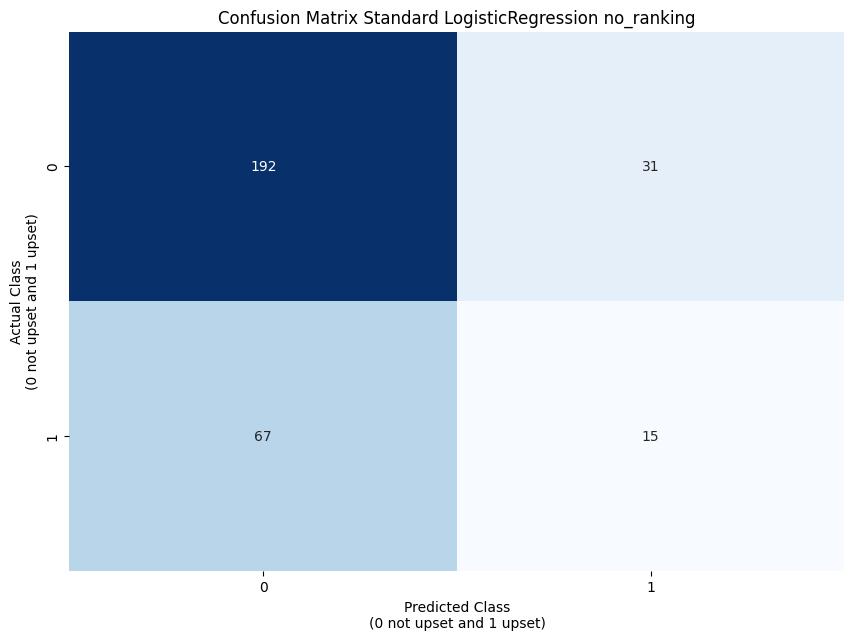

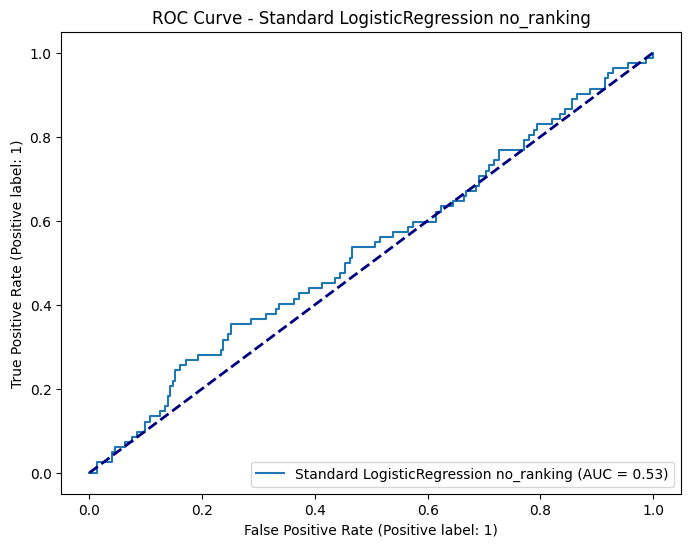

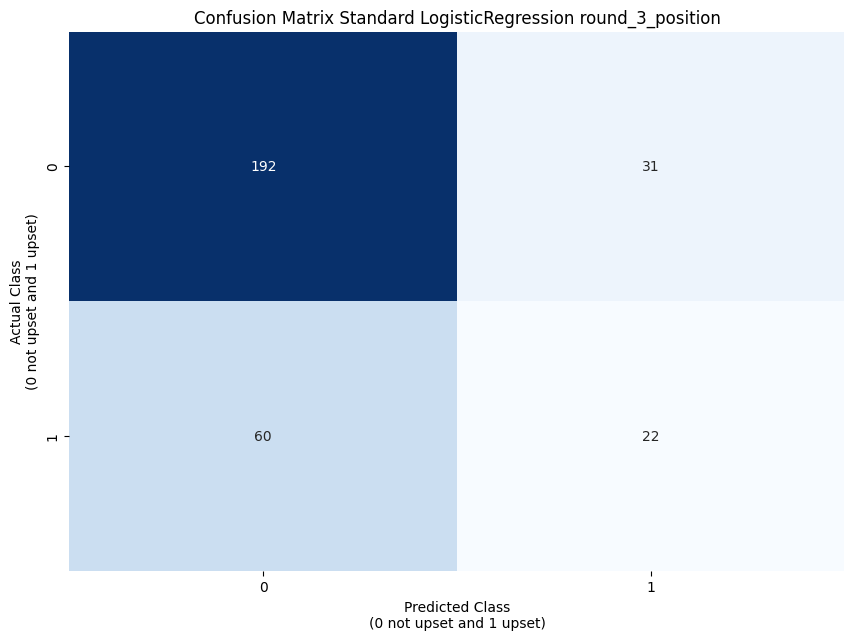

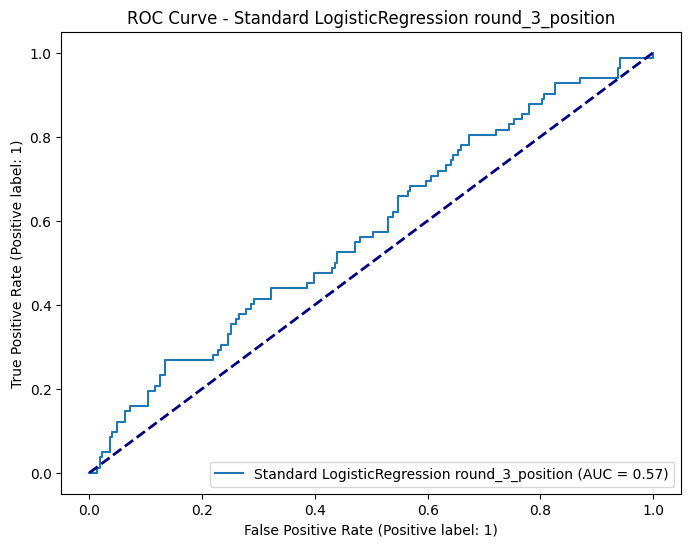

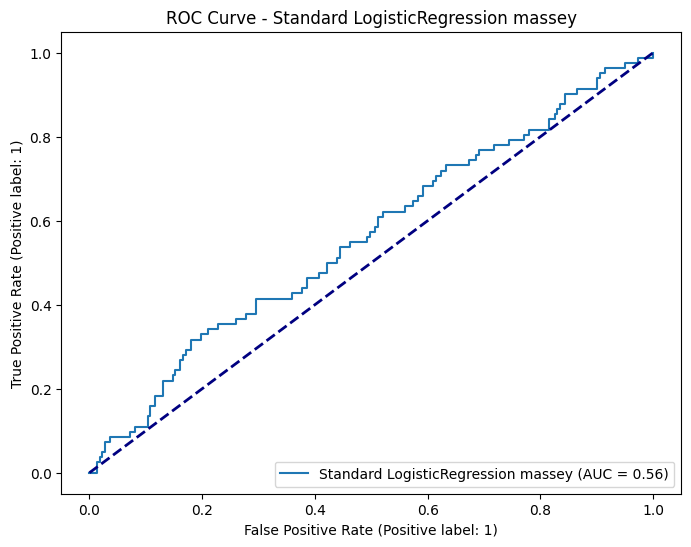

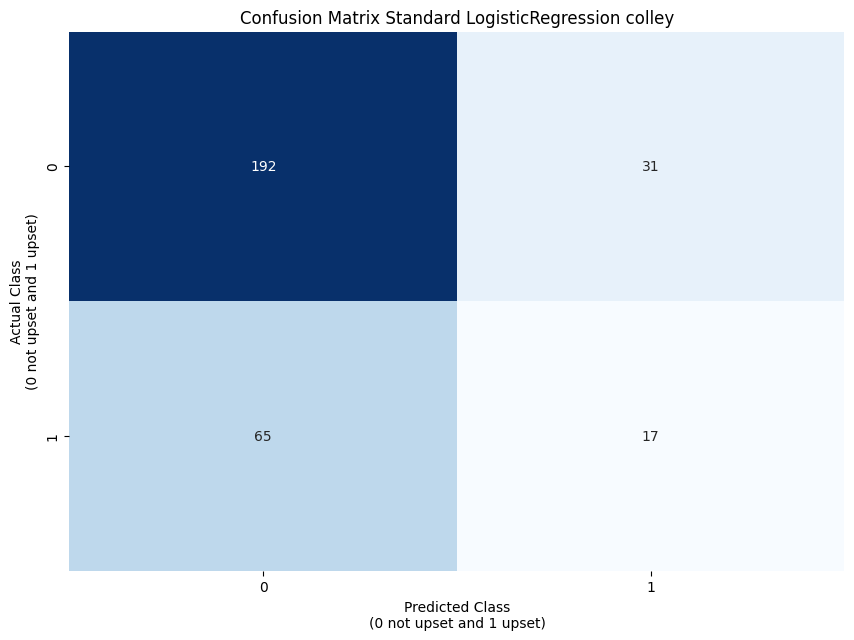

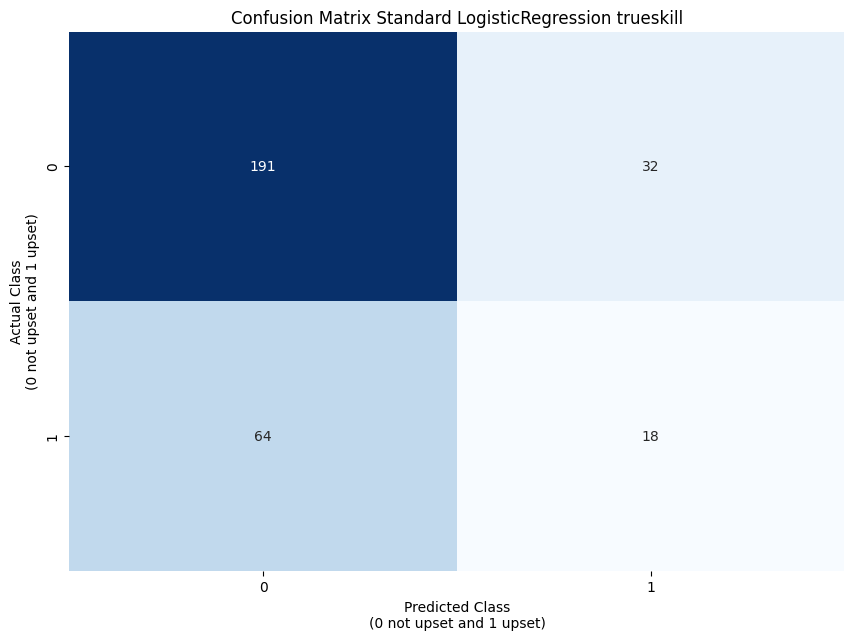

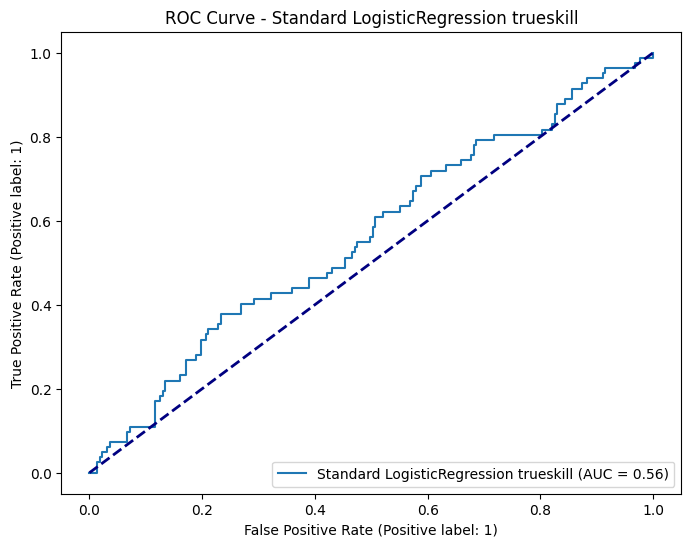

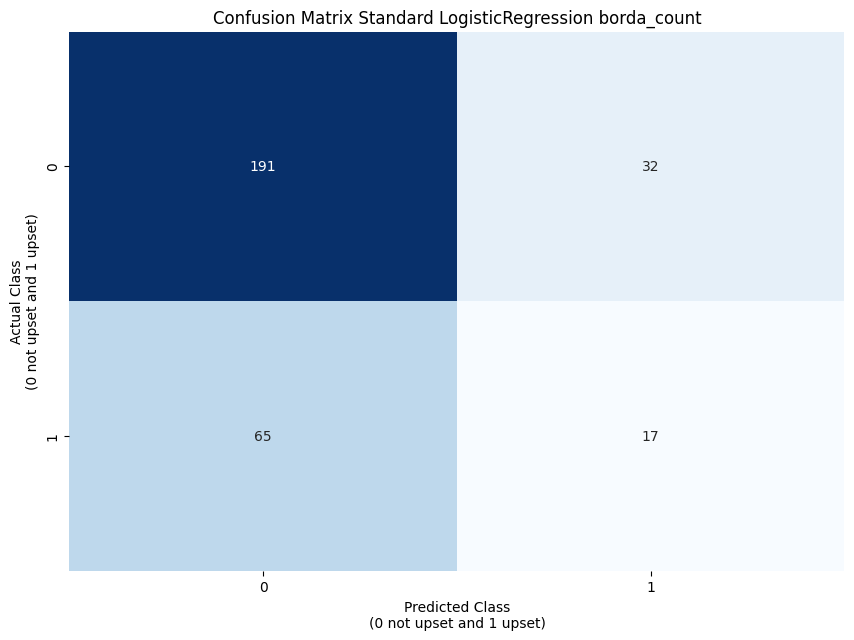

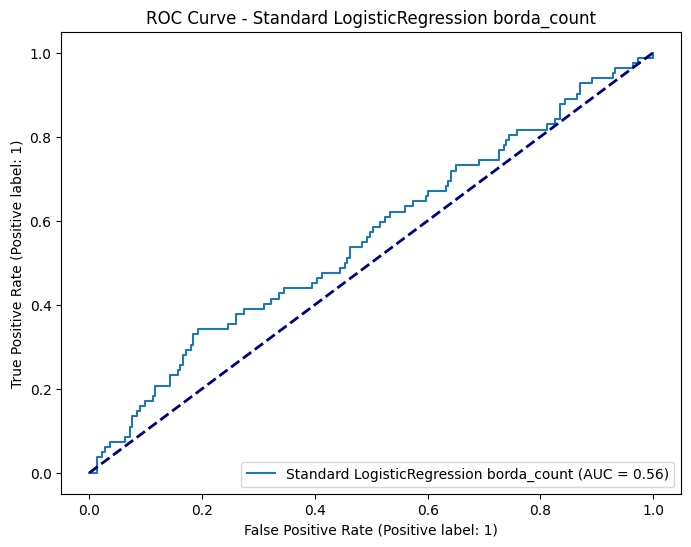

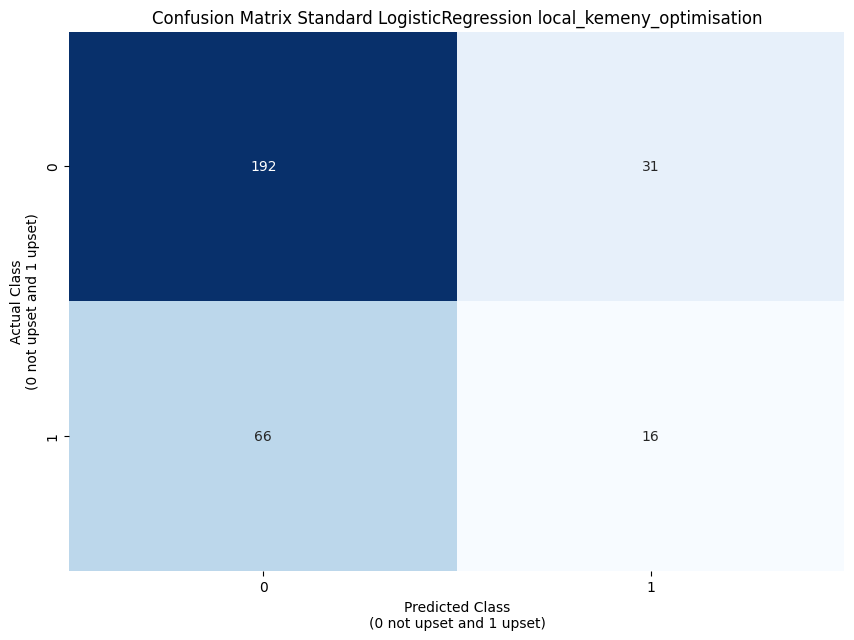

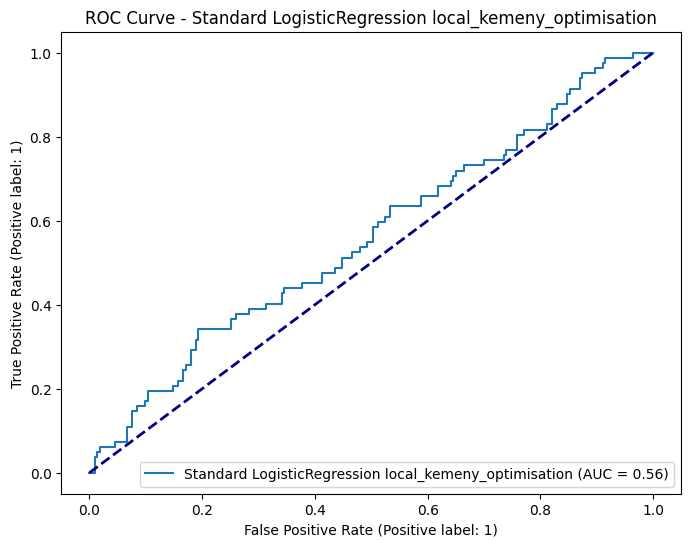

In [ ]:
# Standard, no weights
model_name = "Standard LogisticRegression"
random_state= 47

# Empty df for consolidating confusion report results
all_results_df_slr = pd.DataFrame(columns=['metric_id', 'metric'])

# Fold Grid SearchCV results
fold_results_slr = []

# Define the ranking systems
ranking_systems = ['no_ranking','round_3_position', 'massey', 'colley', 'keener', 'trueskill', 'borda_count', 'local_kemeny_optimisation']

# Get all columns except the target and ranking columns
target_variable = 'target_variable'
base_features = [col for col in fa_cup_raw_features_df.columns if col != target_variable and not any(f"{team}_{ranking}" in col for team in ['home_team', 'away_team'] for ranking in ranking_systems)]

# Identify numeric and categorical columns
numeric_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ranking_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Define cross-validation strategy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

# Loop through each ranking system
for ranking in ranking_systems:
    model_name_ranking = f"{model_name} {ranking}"
    print(model_name_ranking)

    if ranking == 'no_ranking':
        # Use all base features without ranking
        X = fa_cup_raw_features_df[base_features]
    else:
        # Include ranking features
        current_features = base_features + [f'home_team_{ranking}', f'away_team_{ranking}']
        X = fa_cup_raw_features_df[current_features]

    y = fa_cup_raw_features_df['target_variable']

    # Initialize lists to store results for each fold of the model
    fold_accuracies = []
    fold_recalls = []
    confusion_matrices = []
    classification_reports = []
    all_y_true = []
    all_y_pred = []
    all_y_pred_proba = []  # Store probabilities for ROC

    # Perform cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Update preprocessor
        if ranking == 'no_ranking':
            preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numeric_features),
                    ('cat', categorical_transformer, categorical_features)
                ], verbose_feature_names_out=False)

        else:
            preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numeric_features),
                    ('cat', categorical_transformer, categorical_features),
                    ('rank', numeric_transformer, [f'home_team_{ranking}', f'away_team_{ranking}'])
                ], verbose_feature_names_out=False)


        # Create pipeline
        pipeline = Pipeline([
          ('preprocessor', preprocessor),
          ('classifier', LogisticRegression(max_iter=1000))
          ])

        # Define the parameter grid for GridSearchCV
        param_grid = {
          'classifier__C': np.logspace(-3, 3, 7),
          'classifier__penalty': ['l1', 'l2'],
          'classifier__solver': ['liblinear']
        }

        # Create GridSearchCV object
        grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='recall', n_jobs=-1)

        # Fit GridSearchCV
        grid_search.fit(X_train, y_train)

        # Get best model
        best_model = grid_search.best_estimator_

        # Print the best recall from GridSearchCV
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Best Estimator's Recall (from GridSearchCV): {grid_search.best_score_:.3f}")

        # Make predictions
        y_pred = best_model.predict(X_val)
        y_pred_proba = best_model.predict_proba(X_val)[:, 1] # Probabilities for the positive class and ROC curve/AUC Score

        # Calculate accuracy
        accuracy = accuracy_score(y_val, y_pred)
        fold_accuracies.append(accuracy)

        # Calculate recall
        recall = recall_score(y_val, y_pred)
        fold_recalls.append(recall)

         # Store fold results
        fold_results_slr.append({
            'Model Name Ranking': model_name_ranking,
            'Fold': fold,
            'Best Parameters (GridSearchCV)': grid_search.best_params_,
            'Best Recall (GridSearchCV)': grid_search.best_score_,
            'Validation Accuracy': accuracy,
            'Validation Recall': recall
        })

        # Confusion matrix
        cm = confusion_matrix(y_val, y_pred)
        confusion_matrices.append(cm)

        # Generate classification report
        cr = classification_report(y_val, y_pred, output_dict=True)
        classification_reports.append(cr)

        # Store true and predicted values for later analysis
        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)
        all_y_pred_proba.extend(y_pred_proba)

        print(f"Fold {fold} Accuracy: {accuracy:.3f}")
        print(f"Fold {fold} Recall: {recall:.3f}")

    # Calculate average accuracy
    avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f"Average Accuracy: {avg_accuracy:.3f}")

    # Calculate average recall
    avg_recall = sum(fold_recalls) / len(fold_recalls)
    print(f"Average Recall: {avg_recall:.3f}")

    # Calculate overall metrics
    mean_upset_accuracy = np.mean(fold_accuracies)
    std_upset_accuracy = np.std(fold_accuracies)
    mean_upset_recall = np.mean(fold_recalls)
    std_upset_recall = np.std(fold_recalls)

    # Create and display results using existing function
    results_df, cm_fig, roc_fig = create_model_results_df(all_y_true, all_y_pred, fold_accuracies,  all_y_pred_proba, model_name_ranking)
    results_df = results_df.reset_index()
    results_df['metric_id'] = results_df.index + 1
    results_df = results_df[['metric_id', 'metric', model_name_ranking]]

    all_results_df_slr = all_results_df_slr.merge(results_df, on=['metric_id', 'metric'], how='outer')

fold_results_slr_df = pd.DataFrame(fold_results_slr)
display(all_results_df_slr)
display(fold_results_slr_df)

# Change default ouput directory
os.chdir('/content/drive/MyDrive/birkbeck_msc-project/output_files')
# Save ranks to excel
all_results_df_slr.to_excel("all_slr_results.xlsx")
fold_results_slr_df.to_excel("fold_results_slr.xlsx")


Standard LogisticRegression with home advantage no_ranking
Best parameters: {'classifier__C': 100.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Estimator's Recall (from GridSearchCV): 0.485
Fold 1 Accuracy: 0.689
Fold 1 Recall: 0.125
Best parameters: {'classifier__C': 100.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Estimator's Recall (from GridSearchCV): 0.455
Fold 2 Accuracy: 0.639
Fold 2 Recall: 0.250
Best parameters: {'classifier__C': 100.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Estimator's Recall (from GridSearchCV): 0.424
Fold 3 Accuracy: 0.656
Fold 3 Recall: 0.250
Best parameters: {'classifier__C': 10.0, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best Estimator's Recall (from GridSearchCV): 0.443
Fold 4 Accuracy: 0.705
Fold 4 Recall: 0.235


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'classifier__C': 100.0, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.460
Fold 5 Accuracy: 0.721
Fold 5 Recall: 0.176
Average Accuracy: 0.682
Average Recall: 0.207
Standard LogisticRegression with home advantage round_3_position
Best parameters: {'classifier__C': 100.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Estimator's Recall (from GridSearchCV): 0.515
Fold 1 Accuracy: 0.705
Fold 1 Recall: 0.250
Best parameters: {'classifier__C': 1000.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Estimator's Recall (from GridSearchCV): 0.470
Fold 2 Accuracy: 0.705
Fold 2 Recall: 0.312
Best parameters: {'classifier__C': 100.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Estimator's Recall (from GridSearchCV): 0.439
Fold 3 Accuracy: 0.656
Fold 3 Recall: 0.250


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'classifier__C': 1000.0, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.429
Fold 4 Accuracy: 0.738
Fold 4 Recall: 0.294
Best parameters: {'classifier__C': 1000.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Estimator's Recall (from GridSearchCV): 0.507
Fold 5 Accuracy: 0.705
Fold 5 Recall: 0.235
Average Accuracy: 0.702
Average Recall: 0.268
Standard LogisticRegression with home advantage massey
Best parameters: {'classifier__C': 100.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Estimator's Recall (from GridSearchCV): 0.470
Fold 1 Accuracy: 0.689
Fold 1 Recall: 0.188
Best parameters: {'classifier__C': 1000.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Estimator's Recall (from GridSearchCV): 0.439
Fold 2 Accuracy: 0.623
Fold 2 Recall: 0.188
Best parameters: {'classifier__C': 100.0, 'classifier__penalty': 'l1', 'classifier__solver': 'lib

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'classifier__C': 100.0, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.485
Fold 2 Accuracy: 0.607
Fold 2 Recall: 0.188
Best parameters: {'classifier__C': 10.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Estimator's Recall (from GridSearchCV): 0.455
Fold 3 Accuracy: 0.639
Fold 3 Recall: 0.188
Best parameters: {'classifier__C': 10.0, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best Estimator's Recall (from GridSearchCV): 0.444
Fold 4 Accuracy: 0.689
Fold 4 Recall: 0.235
Best parameters: {'classifier__C': 100.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Estimator's Recall (from GridSearchCV): 0.491
Fold 5 Accuracy: 0.738
Fold 5 Recall: 0.176
Average Accuracy: 0.672
Average Recall: 0.195
Standard LogisticRegression with home advantage keener
Best parameters: {'classifier__C': 100.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinea

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'classifier__C': 100.0, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.515
Fold 1 Accuracy: 0.672
Fold 1 Recall: 0.188
Best parameters: {'classifier__C': 1000.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Estimator's Recall (from GridSearchCV): 0.470
Fold 2 Accuracy: 0.656
Fold 2 Recall: 0.188
Best parameters: {'classifier__C': 100.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Estimator's Recall (from GridSearchCV): 0.439
Fold 3 Accuracy: 0.672
Fold 3 Recall: 0.375
Best parameters: {'classifier__C': 10.0, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best Estimator's Recall (from GridSearchCV): 0.444
Fold 4 Accuracy: 0.672
Fold 4 Recall: 0.235
Best parameters: {'classifier__C': 1000.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Estimator's Recall (from GridSearchCV): 0.491
Fold 5 Accuracy: 0.738
Fold 5 Recall: 0.176

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'classifier__C': 100.0, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.455
Fold 3 Accuracy: 0.656
Fold 3 Recall: 0.312
Best parameters: {'classifier__C': 10.0, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best Estimator's Recall (from GridSearchCV): 0.444
Fold 4 Accuracy: 0.672
Fold 4 Recall: 0.235
Best parameters: {'classifier__C': 1000.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Estimator's Recall (from GridSearchCV): 0.475
Fold 5 Accuracy: 0.754
Fold 5 Recall: 0.235
Average Accuracy: 0.679
Average Recall: 0.232
Standard LogisticRegression with home advantage local_kemeny_optimisation
Best parameters: {'classifier__C': 100.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Estimator's Recall (from GridSearchCV): 0.515
Fold 1 Accuracy: 0.705
Fold 1 Recall: 0.188
Best parameters: {'classifier__C': 1000.0, 'classifier__penalty': 'l1', 'classifi

metric_id                                       metric  \
0           1                    Cross-validation Accuracy   
1           2          Cross-validation Standard Deviation   
2           3                             Overall Accuracy   
3           4   Confusion Matrix - True Negative (Class 0)   
4           5  Confusion Matrix - False Positive (Class 1)   
5           6  Confusion Matrix - False Negative (Class 0)   
6           7   Confusion Matrix - True Positive (Class 1)   
7           8                          Precision (Class 0)   
8           9                             Recall (Class 0)   
9          10                           F1-score (Class 0)   
10         11                          Precision (Class 1)   
11         12                             Recall (Class 1)   
12         13                           F1-score (Class 1)   
13         14                          Macro avg Precision   
14         15                             Macro avg Recall   
15         16                           Macro avg F1-score   
16         17                       Weighted avg Precision   
17         18                          Weighted avg Recall   
18         19                        Weighted avg F1-score   
19         20                                      AUC-ROC   

   Standard LogisticRegression with home advantage no_ranking  \
0                                               0.682           
1                                               0.030           
2                                               0.682           
3                                             191.000           
4                                              32.000           
5                                              65.000           
6                                              17.000           
7                                               0.746           
8                                               0.857           
9                                               0.797           
10                                              0.347           
11                                              0.207           
12                                              0.260           
13                                              0.547           
14                                              0.532           
15                                              0.529           
16                                              0.639           
17                                              0.682           
18                                              0.653           
19                                              0.521           

   Standard LogisticRegression with home advantage round_3_position  \
0                                               0.702                 
1                                               0.026                 
2                                               0.702                 
3                                             192.000                 
4                                              31.000                 
5                                              60.000                 
6                                              22.000                 
7                                               0.762                 
8                                               0.861                 
9                                               0.808                 
10                                              0.415                 
11                                              0.268                 
12                                              0.326                 
13                                              0.588                 
14                                              0.565                 
15                                              0.567                 
16                                              0.669                 
17                                              0.702    

Model Name Ranking  Fold  \
0   Standard LogisticRegression with home advantag...     1   
1   Standard LogisticRegression with home advantag...     2   
2   Standard LogisticRegression with home advantag...     3   
3   Standard LogisticRegression with home advantag...     4   
4   Standard LogisticRegression with home advantag...     5   
5   Standard LogisticRegression with home advantag...     1   
6   Standard LogisticRegression with home advantag...     2   
7   Standard LogisticRegression with home advantag...     3   
8   Standard LogisticRegression with home advantag...     4   
9   Standard LogisticRegression with home advantag...     5   
10  Standard LogisticRegression with home advantag...     1   
11  Standard LogisticRegression with home advantag...     2   
12  Standard LogisticRegression with home advantag...     3   
13  Standard LogisticRegression with home advantag...     4   
14  Standard LogisticRegression with home advantag...     5   
15  Standard LogisticRegression with home advantag...     1   
16  Standard LogisticRegression with home advantag...     2   
17  Standard LogisticRegression with home advantag...     3   
18  Standard LogisticRegression with home advantag...     4   
19  Standard LogisticRegression with home advantag...     5   
20  Standard LogisticRegression with home advantag...     1   
21  Standard LogisticRegression with home advantag...     2   
22  Standard LogisticRegression with home advantag...     3   
23  Standard LogisticRegression with home advantag...     4   
24  Standard LogisticRegression with home advantag...     5   
25  Standard LogisticRegression with home advantag...     1   
26  Standard LogisticRegression with home advantag...     2   
27  Standard LogisticRegression with home advantag...     3   
28  Standard LogisticRegression with home advantag...     4   
29  Standard LogisticRegression with home advantag...     5   
30  Standard LogisticRegression with home advantag...     1   
31  Standard LogisticRegression with home advantag...     2   
32  Standard LogisticRegression with home advantag...     3   
33  Standard LogisticRegression with home advantag...     4   
34  Standard LogisticRegression with home advantag...     5   
35  Standard LogisticRegression with home advantag...     1   
36  Standard LogisticRegression with home advantag...     2   
37  Standard LogisticRegression with home advantag...     3   
38  Standard LogisticRegression with home advantag...     4   
39  Standard LogisticRegression with home advantag...     5   

                       Best Parameters (GridSearchCV)  \
0   {'classifier__C': 100.0, 'classifier__penalty'...   
1   {'classifier__C': 100.0, 'classifier__penalty'...   
2   {'classifier__C': 100.0, 'classifier__penalty'...   
3   {'classifier__C': 10.0, 'classifier__penalty':...   
4   {'classifier__C': 100.0, 'classifier__penalty'...   
5   {'classifier__C': 100.0, 'classifier__penalty'...   
6   {'classifier__C': 1000.0, 'classifier__penalty...   
7   {'classifier__C': 100.0, 'classifier__penalty'...   
8   {'classifier__C': 1000.0, 'classifier__penalty...   
9   {'classifier__C': 1000.0, 'classifier__penalty...   
10  {'classifier__C': 100.0, 'classifier__penalty'...   
11  {'classifier__C': 1000.0, 'classifier__penalty...   
12  {'classifier__C': 100.0, 'classifier__penalty'...   
13  {'classifier__C': 10.0, 'classifier__penalty':...   
14  {'classifier__C': 1000.0, 'classifier__penalty...   
15  {'classifier__C': 100.0, 'classifier__penalty'...   
16  {'classifier__C': 100.0, 'classifier__penalty'...   
17  {'classifier__C': 10.0, 'classifier__penalty':...   
18  {'classifier__C': 10.0, 'classifier__penalty':...   
19  {'classifier__C': 100.0, 'classifier__penalty'...   
20  {'classifier__C': 100.0, 'classifier__penalty'...   
21  {'classifier__C': 1000.0, 'classifier__penalty...   
22  {'classifier__C': 100.0, 'classifier__penalty'...   
23  {'classifier__C': 10.0, 'classifier__penalty':...   
24  {'classifier__C': 1000

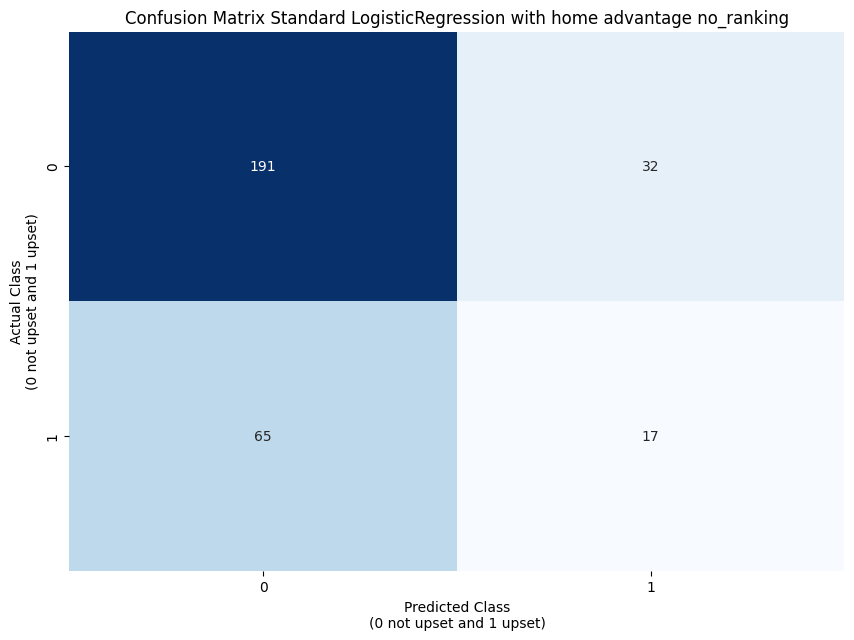

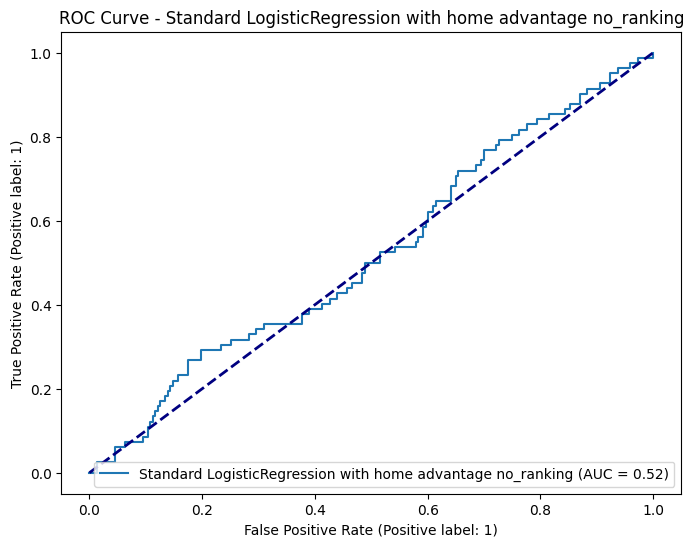

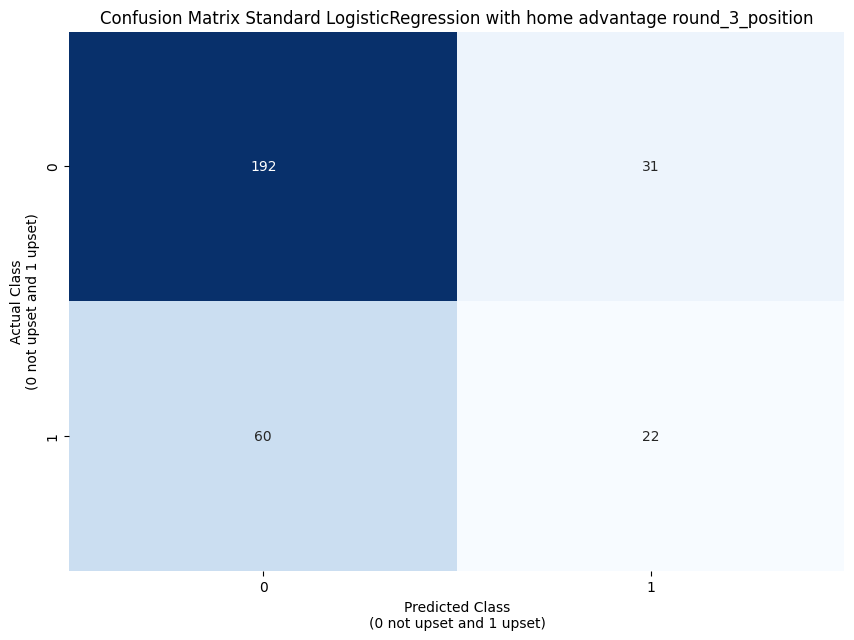

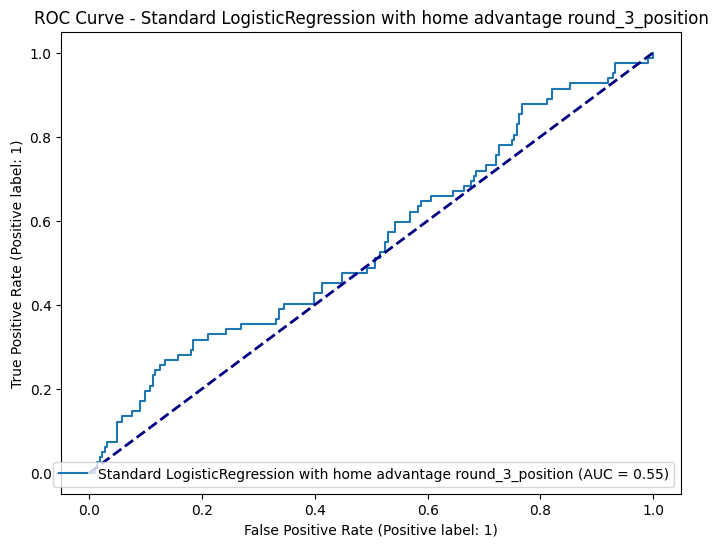

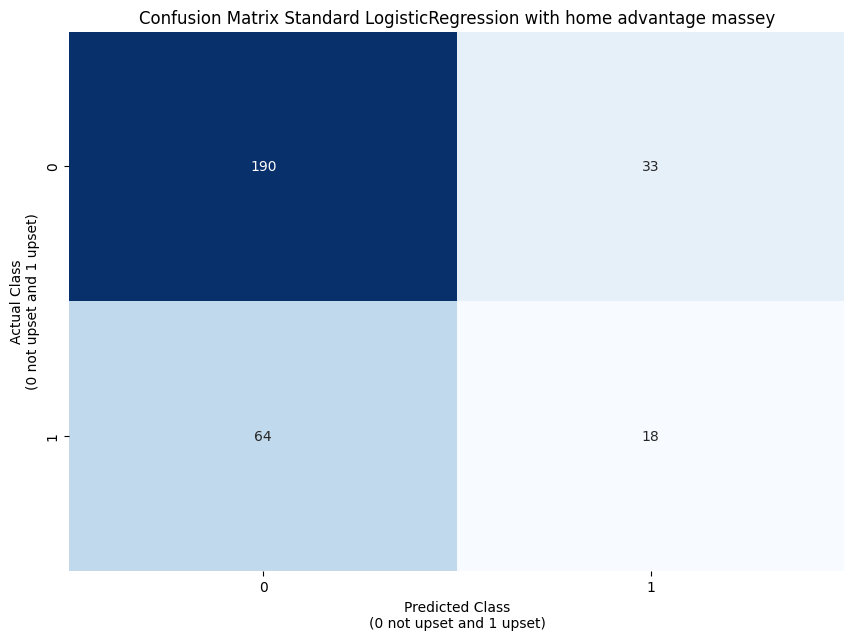

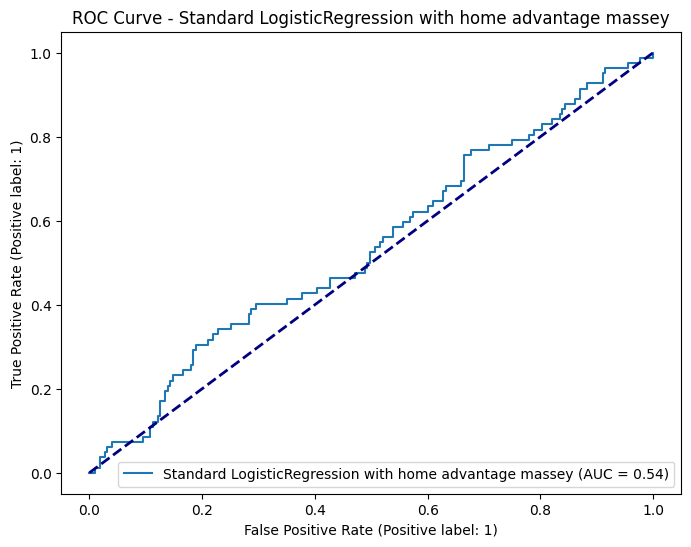

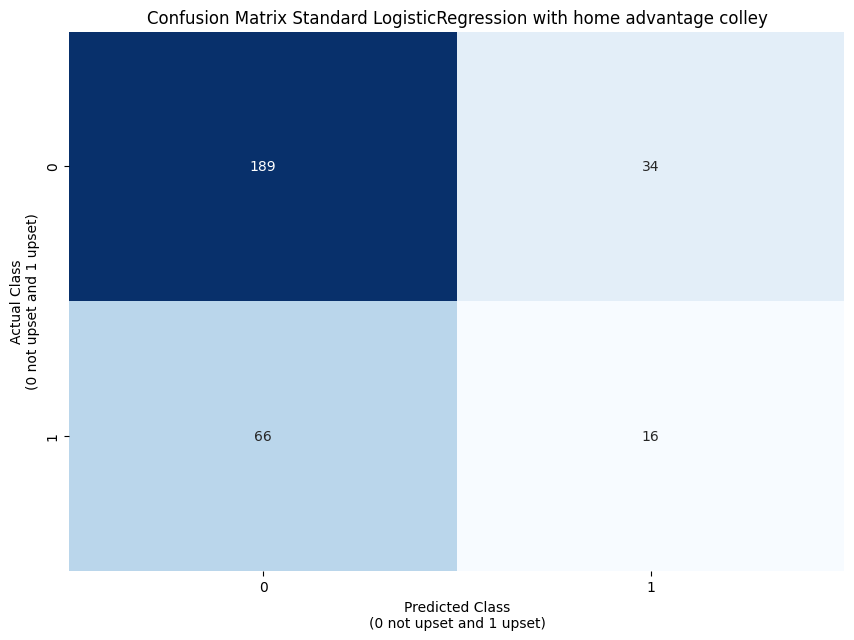

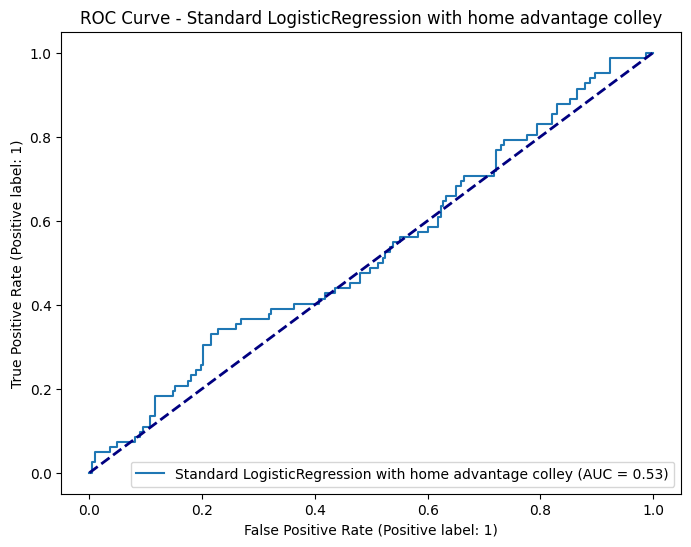

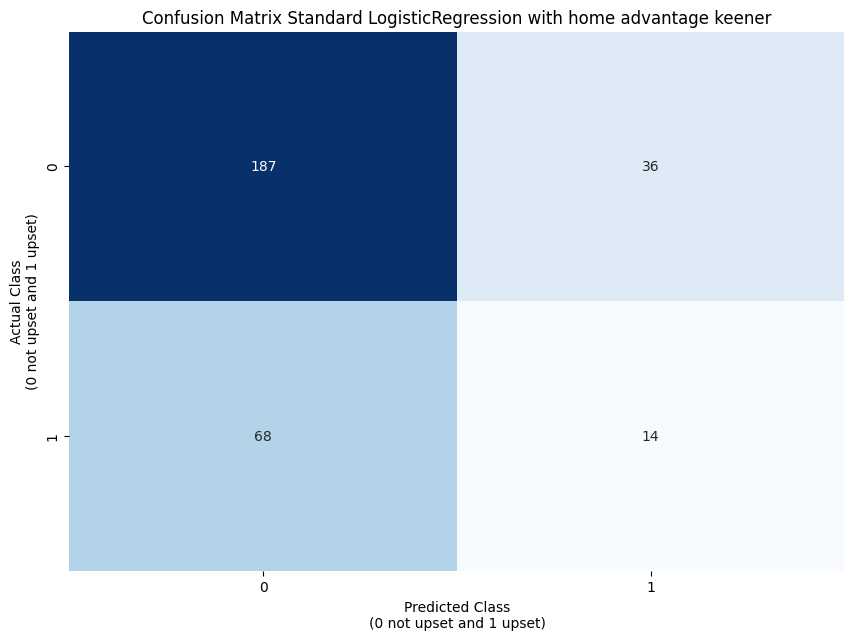

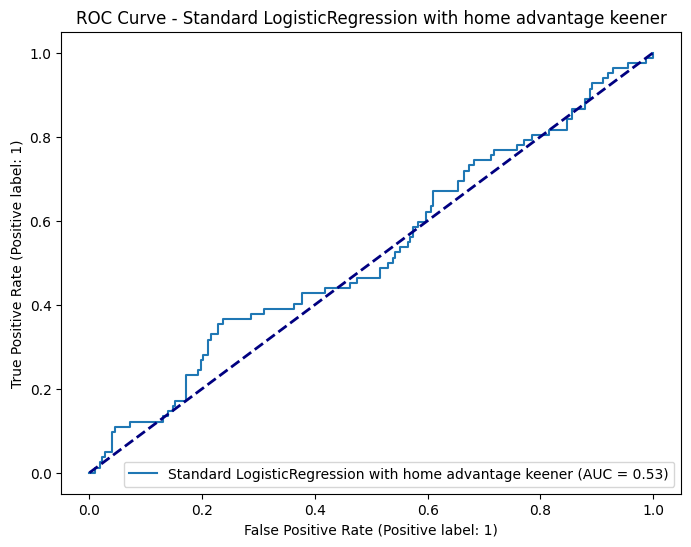

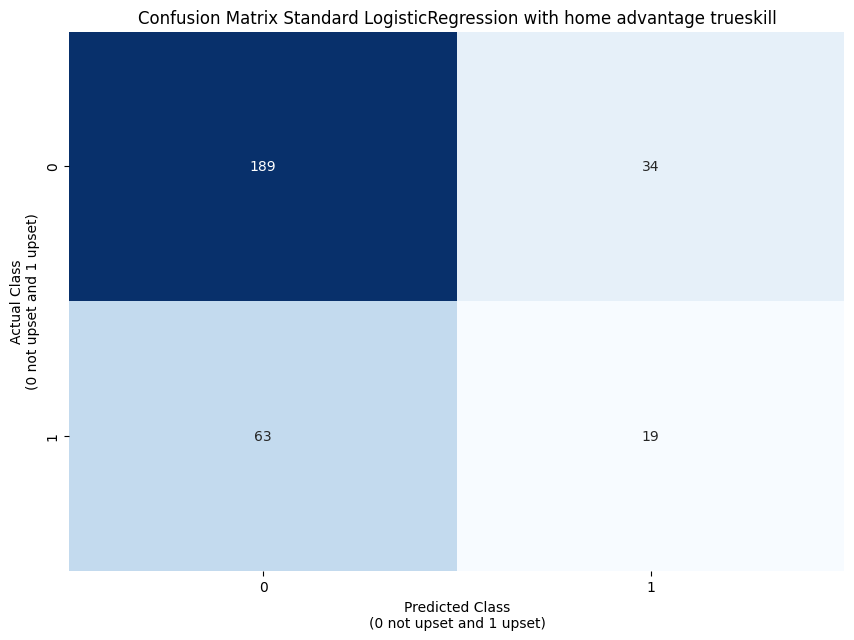

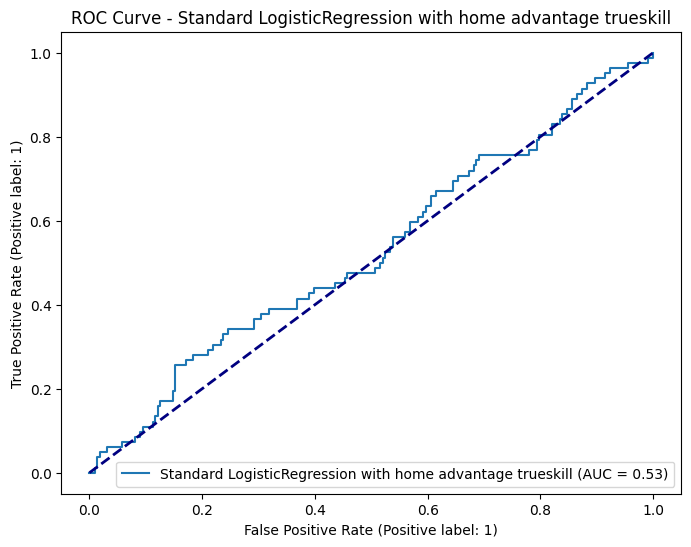

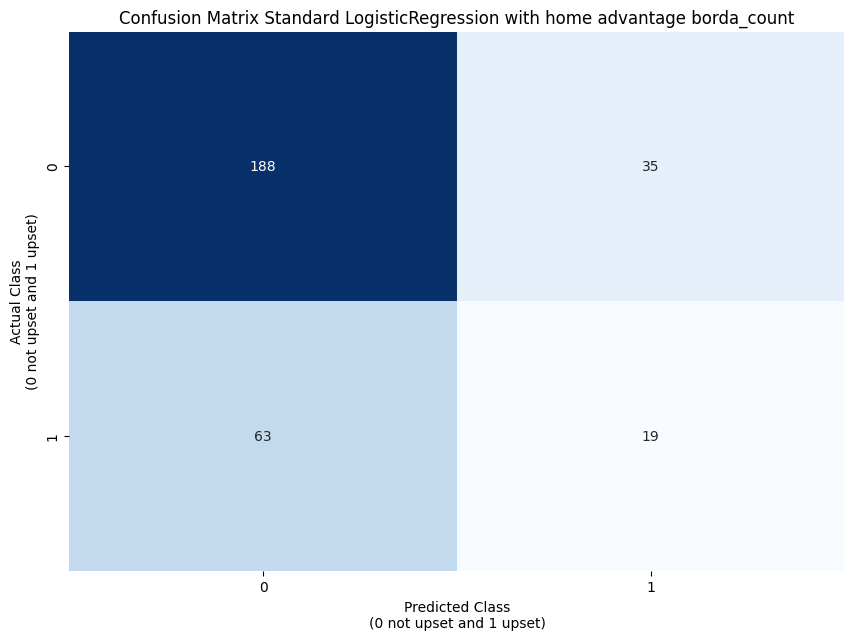

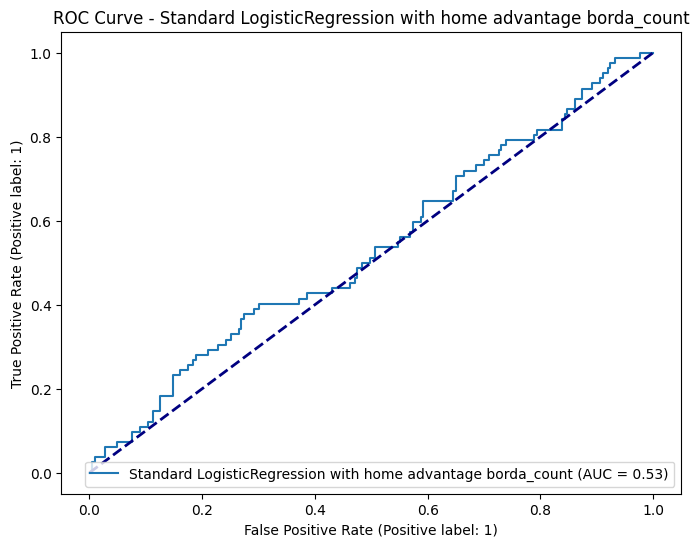

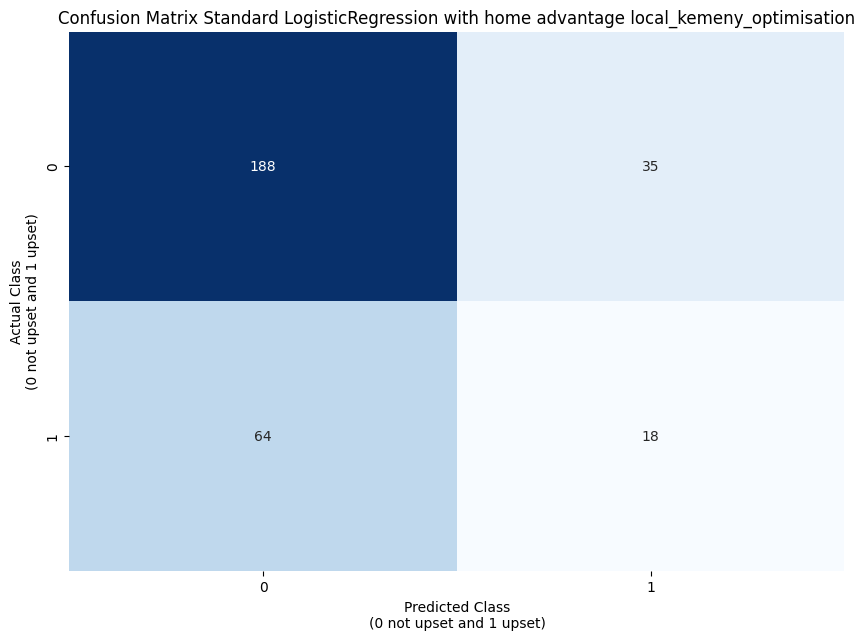

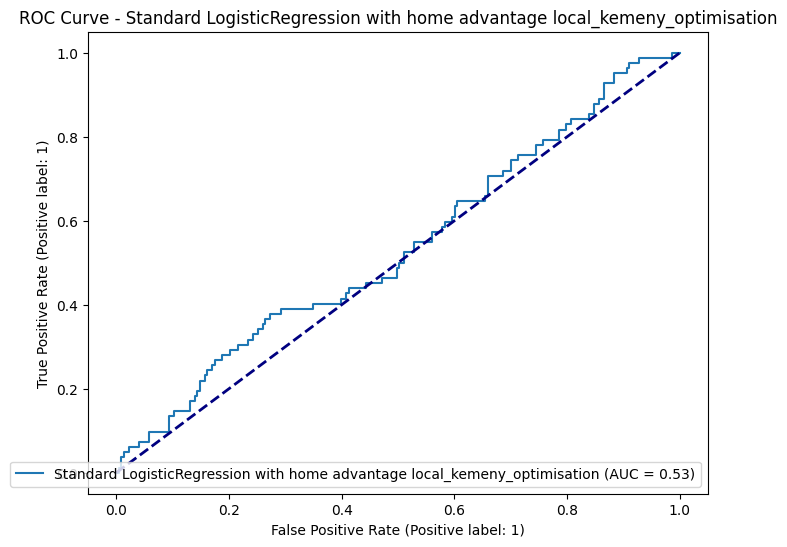

In [ ]:
# Standard, no weights with home advantage
model_name = "Standard LogisticRegression with home advantage"
random_state= 47

# Empty df for consolidating confusion report results
all_results_df_slrh = pd.DataFrame(columns=['metric_id', 'metric'])

# Fold Grid SearchCV results
fold_results_slrh = []

# Define the ranking systems
ranking_systems = ['no_ranking','round_3_position', 'massey', 'colley', 'keener', 'trueskill', 'borda_count', 'local_kemeny_optimisation']

# Get all columns except the target and ranking columns
target_variable = 'target_variable'
base_features = [col for col in fa_cup_raw_features_df.columns if col != target_variable and not any(f"{team}_{ranking}" in col for team in ['home_team', 'away_team'] for ranking in ranking_systems)]

# Identify numeric and categorical columns
numeric_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ranking_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Define cross-validation strategy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

# Loop through each ranking system
for ranking in ranking_systems:
    model_name_ranking = f"{model_name} {ranking}"
    print(model_name_ranking)

    if ranking == 'no_ranking':
        # Use all base features without ranking
        X = fa_cup_raw_features_df[base_features]
    else:
        # Include ranking features
        current_features = base_features + [f'home_team_{ranking}', f'away_team_{ranking}']
        X = fa_cup_raw_features_df[current_features]

    y = fa_cup_raw_features_df['target_variable']

    # Initialize lists to store results for each fold of the model
    fold_accuracies = []
    fold_recalls = []
    confusion_matrices = []
    classification_reports = []
    all_y_true = []
    all_y_pred = []
    all_y_pred_proba = []  # Store probabilities for ROC

    # Perform cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Add home advantage factor
        X_train, home_advantage_column = add_home_advantage(X_train)
        X_val, _ = add_home_advantage(X_val)

        # Update numeric_features to include the home advantage column
        numeric_features = [home_advantage_column] + numeric_features

        # Update preprocessor
        if ranking == 'no_ranking':
            preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numeric_features),
                    ('cat', categorical_transformer, categorical_features)
                ], verbose_feature_names_out=False)

        else:
            preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numeric_features),
                    ('cat', categorical_transformer, categorical_features),
                    ('rank', numeric_transformer, [f'home_team_{ranking}', f'away_team_{ranking}'])
                ], verbose_feature_names_out=False)

        # Create pipeline
        pipeline = Pipeline([
          ('preprocessor', preprocessor),
          ('classifier', LogisticRegression(max_iter=1000))
          ])

        # Define the parameter grid for GridSearchCV
        param_grid = {
          'classifier__C': np.logspace(-3, 3, 7),
          'classifier__penalty': ['l1', 'l2'],
          'classifier__solver': ['liblinear']
        }

        # Create GridSearchCV object
        grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='recall', n_jobs=-1)

        # Fit GridSearchCV
        grid_search.fit(X_train, y_train)

        # Get best model
        best_model = grid_search.best_estimator_

        # Print the best recall from GridSearchCV
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Best Estimator's Recall (from GridSearchCV): {grid_search.best_score_:.3f}")

        # Make predictions
        y_pred = best_model.predict(X_val)
        y_pred_proba = best_model.predict_proba(X_val)[:, 1] # Probabilities for the positive class and ROC curve/AUC Score

        # Calculate accuracy
        accuracy = accuracy_score(y_val, y_pred)
        fold_accuracies.append(accuracy)

        # Calculate recall
        recall = recall_score(y_val, y_pred)
        fold_recalls.append(recall)

        # Store fold results
        fold_results_slrh.append({
            'Model Name Ranking': model_name_ranking,
            'Fold': fold,
            'Best Parameters (GridSearchCV)': grid_search.best_params_,
            'Best Recall (GridSearchCV)': grid_search.best_score_,
            'Validation Accuracy': accuracy,
            'Validation Recall': recall
        })

        # Confusion matrix
        cm = confusion_matrix(y_val, y_pred)
        confusion_matrices.append(cm)

        # Generate classification report
        cr = classification_report(y_val, y_pred, output_dict=True)
        classification_reports.append(cr)

        # Store true and predicted values for later analysis
        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)
        all_y_pred_proba.extend(y_pred_proba)

        print(f"Fold {fold} Accuracy: {accuracy:.3f}")
        print(f"Fold {fold} Recall: {recall:.3f}")

    # Calculate average accuracy
    avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f"Average Accuracy: {avg_accuracy:.3f}")

    # Calculate average recall
    avg_recall = sum(fold_recalls) / len(fold_recalls)
    print(f"Average Recall: {avg_recall:.3f}")

    # Calculate overall metrics
    mean_upset_accuracy = np.mean(fold_accuracies)
    std_upset_accuracy = np.std(fold_accuracies)
    mean_upset_recall = np.mean(fold_recalls)
    std_upset_recall = np.std(fold_recalls)

    # Create and display results using existing function
    results_df, cm_fig, roc_fig = create_model_results_df(all_y_true, all_y_pred, fold_accuracies,  all_y_pred_proba, model_name_ranking)
    results_df = results_df.reset_index()
    results_df['metric_id'] = results_df.index + 1
    results_df = results_df[['metric_id', 'metric', model_name_ranking]]

    all_results_df_slrh = all_results_df_slrh.merge(results_df, on=['metric_id', 'metric'], how='outer')

fold_results_slrh_df = pd.DataFrame(fold_results_slrh)
display(all_results_df_slrh)
display(fold_results_slrh_df)

# Change default ouput directory
os.chdir('/content/drive/MyDrive/birkbeck_msc-project/output_files')
# Save ranks to excel
all_results_df_slrh.to_excel("all_slrh_results.xlsx")
fold_results_slrh_df.to_excel("fold_results_slrh.xlsx")

Weighted LogisticRegression no_ranking


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'classifier__C': 0.001, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 1.000
Fold 1 Accuracy: 0.279
Fold 1 Recall: 1.000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'classifier__C': 10.0, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.712
Fold 2 Accuracy: 0.475
Fold 2 Recall: 0.688


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. 

Best parameters: {'classifier__C': 0.001, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.667
Fold 3 Accuracy: 0.738
Fold 3 Recall: 0.000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'classifier__C': 0.01, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.797
Fold 4 Accuracy: 0.295
Fold 4 Recall: 0.706


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.758
Fold 5 Accuracy: 0.656
Fold 5 Recall: 0.118
Average Accuracy: 0.489
Average Recall: 0.502
Weighted LogisticRegression round_3_position


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'classifier__C': 1.0, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.773
Fold 1 Accuracy: 0.279
Fold 1 Recall: 0.938


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'classifier__C': 1.0, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.682
Fold 2 Accuracy: 0.377
Fold 2 Recall: 0.938


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. 

Best parameters: {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.561
Fold 3 Accuracy: 0.262
Fold 3 Recall: 1.000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. 

Best parameters: {'classifier__C': 0.001, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.667
Fold 4 Accuracy: 0.721
Fold 4 Recall: 0.000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. 

Best parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.681
Fold 5 Accuracy: 0.721
Fold 5 Recall: 0.000
Average Accuracy: 0.472
Average Recall: 0.575
Weighted LogisticRegression massey


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'classifier__C': 0.001, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.727
Fold 1 Accuracy: 0.738
Fold 1 Recall: 0.062


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'classifier__C': 1000.0, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.636
Fold 2 Accuracy: 0.443
Fold 2 Recall: 0.688


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. 

Best parameters: {'classifier__C': 0.001, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 1.000
Fold 3 Accuracy: 0.262
Fold 3 Recall: 1.000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'classifier__C': 0.001, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.984
Fold 4 Accuracy: 0.525
Fold 4 Recall: 0.588


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'classifier__C': 0.01, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.773
Fold 5 Accuracy: 0.426
Fold 5 Recall: 0.471
Average Accuracy: 0.479
Average Recall: 0.562
Weighted LogisticRegression colley


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. 

Best parameters: {'classifier__C': 0.001, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.864
Fold 1 Accuracy: 0.262
Fold 1 Recall: 1.000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'classifier__C': 0.001, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.833
Fold 2 Accuracy: 0.639
Fold 2 Recall: 0.125


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. 

Best parameters: {'classifier__C': 0.001, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.864
Fold 3 Accuracy: 0.738
Fold 3 Recall: 0.000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. 

Best parameters: {'classifier__C': 0.001, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 1.000
Fold 4 Accuracy: 0.279
Fold 4 Recall: 1.000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. 

Best parameters: {'classifier__C': 0.001, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.667
Fold 5 Accuracy: 0.721
Fold 5 Recall: 0.000
Average Accuracy: 0.528
Average Recall: 0.425
Weighted LogisticRegression keener


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'classifier__C': 100.0, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.697
Fold 1 Accuracy: 0.541
Fold 1 Recall: 0.750


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'classifier__C': 0.01, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.924
Fold 2 Accuracy: 0.443
Fold 2 Recall: 0.625


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'classifier__C': 1000.0, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.621
Fold 3 Accuracy: 0.672
Fold 3 Recall: 0.250


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. 

Best parameters: {'classifier__C': 0.001, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.955
Fold 4 Accuracy: 0.279
Fold 4 Recall: 1.000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. 

Best parameters: {'classifier__C': 0.001, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.742
Fold 5 Accuracy: 0.721
Fold 5 Recall: 0.000
Average Accuracy: 0.531
Average Recall: 0.525
Weighted LogisticRegression trueskill


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. 

Best parameters: {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.636
Fold 1 Accuracy: 0.738
Fold 1 Recall: 0.000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. 

Best parameters: {'classifier__C': 0.001, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.697
Fold 2 Accuracy: 0.738
Fold 2 Recall: 0.000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'classifier__C': 1.0, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.727
Fold 3 Accuracy: 0.607
Fold 3 Recall: 0.625


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. 

Best parameters: {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.682
Fold 4 Accuracy: 0.721
Fold 4 Recall: 0.000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. 

Best parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.697
Fold 5 Accuracy: 0.721
Fold 5 Recall: 0.000
Average Accuracy: 0.705
Average Recall: 0.125
Weighted LogisticRegression borda_count


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. 

Best parameters: {'classifier__C': 0.001, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 1.000
Fold 1 Accuracy: 0.262
Fold 1 Recall: 1.000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. 

Best parameters: {'classifier__C': 0.001, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 1.000
Fold 2 Accuracy: 0.738
Fold 2 Recall: 0.000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.894
Fold 3 Accuracy: 0.656
Fold 3 Recall: 0.000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'classifier__C': 0.001, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 1.000
Fold 4 Accuracy: 0.705
Fold 4 Recall: 0.000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. 

Best parameters: {'classifier__C': 1.0, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.773
Fold 5 Accuracy: 0.721
Fold 5 Recall: 0.000
Average Accuracy: 0.616
Average Recall: 0.200
Weighted LogisticRegression local_kemeny_optimisation


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. 

Best parameters: {'classifier__C': 0.001, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 1.000
Fold 1 Accuracy: 0.738
Fold 1 Recall: 0.000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. 

Best parameters: {'classifier__C': 0.001, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 0.667
Fold 2 Accuracy: 0.738
Fold 2 Recall: 0.000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. 

Best parameters: {'classifier__C': 0.001, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 1.000
Fold 3 Accuracy: 0.262
Fold 3 Recall: 1.000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. 

Best parameters: {'classifier__C': 0.001, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best Estimator's Recall (from GridSearchCV): 1.000
Fold 4 Accuracy: 0.279
Fold 4 Recall: 1.000
Best parameters: {'classifier__C': 0.01, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Estimator's Recall (from GridSearchCV): 0.681
Fold 5 Accuracy: 0.492
Fold 5 Recall: 0.353
Average Accuracy: 0.502
Average Recall: 0.471


metric_id                                       metric  \
0           1                    Cross-validation Accuracy   
1           2          Cross-validation Standard Deviation   
2           3                             Overall Accuracy   
3           4   Confusion Matrix - True Negative (Class 0)   
4           5  Confusion Matrix - False Positive (Class 1)   
5           6  Confusion Matrix - False Negative (Class 0)   
6           7   Confusion Matrix - True Positive (Class 1)   
7           8                          Precision (Class 0)   
8           9                             Recall (Class 0)   
9          10                           F1-score (Class 0)   
10         11                          Precision (Class 1)   
11         12                             Recall (Class 1)   
12         13                           F1-score (Class 1)   
13         14                          Macro avg Precision   
14         15                             Macro avg Recall   
15         16                           Macro avg F1-score   
16         17                       Weighted avg Precision   
17         18                          Weighted avg Recall   
18         19                        Weighted avg F1-score   
19         20                                      AUC-ROC   

   Weighted LogisticRegression no_ranking  \
0                                   0.489   
1                                   0.185   
2                                   0.489   
3                                 108.000   
4                                 115.000   
5                                  41.000   
6                                  41.000   
7                                   0.725   
8                                   0.484   
9                                   0.581   
10                                  0.263   
11                                  0.500   
12                                  0.345   
13                                  0.494   
14                                  0.492   
15                                  0.463   
16                                  0.601   
17                                  0.489   
18                                  0.517   
19                                  0.492   

   Weighted LogisticRegression round_3_position  \
0                                         0.472   
1                                         0.207   
2                                         0.472   
3                                        98.000   
4                                       125.000   
5                                        36.000   
6                                        46.000   
7                                         0.731   
8                                         0.439   
9                                         0.549   
10                                        0.269   
11                                        0.561   
12                                        0.364   
13                                        0.500   
14                                        0.500   
15                                        0.456   
16                                        0.607   
17                                        0.472   
18                                        0.499   
19                                        0.524   

   Weighted LogisticRegression massey Weighted LogisticRegression colley  \
0                               0.479                              0.528   
1                               0.155                              0.213   
2                               0.479                              0.528   
3                             100.000                            126.000   
4                             123.000                             97.000   
5                              36.000                             47.000   
6                              46.000                             35.000   
7                               0.735                              0.728   

Empty DataFrame
Columns: []
Index: []

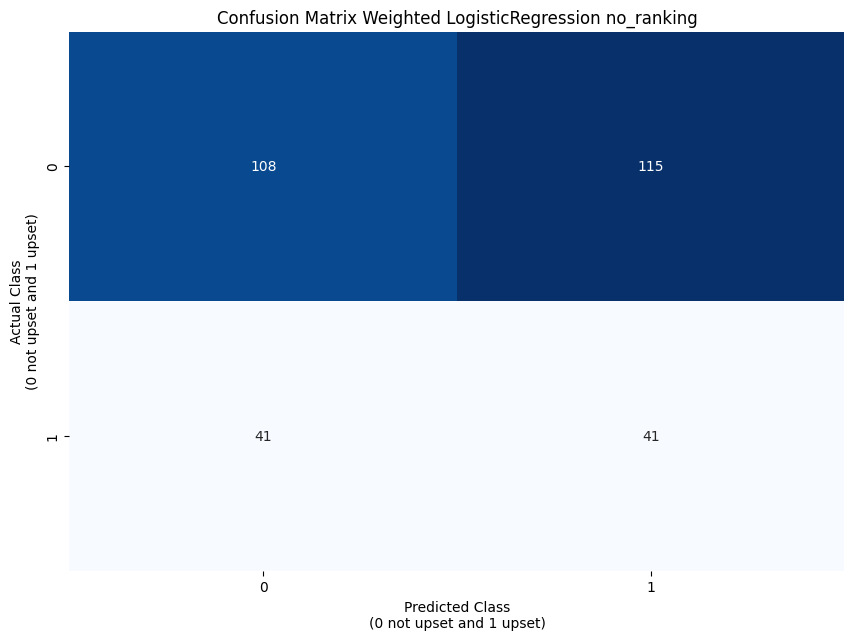

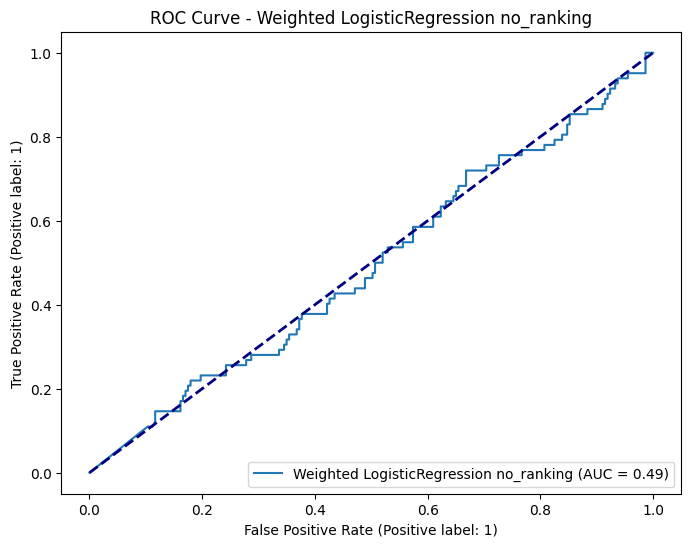

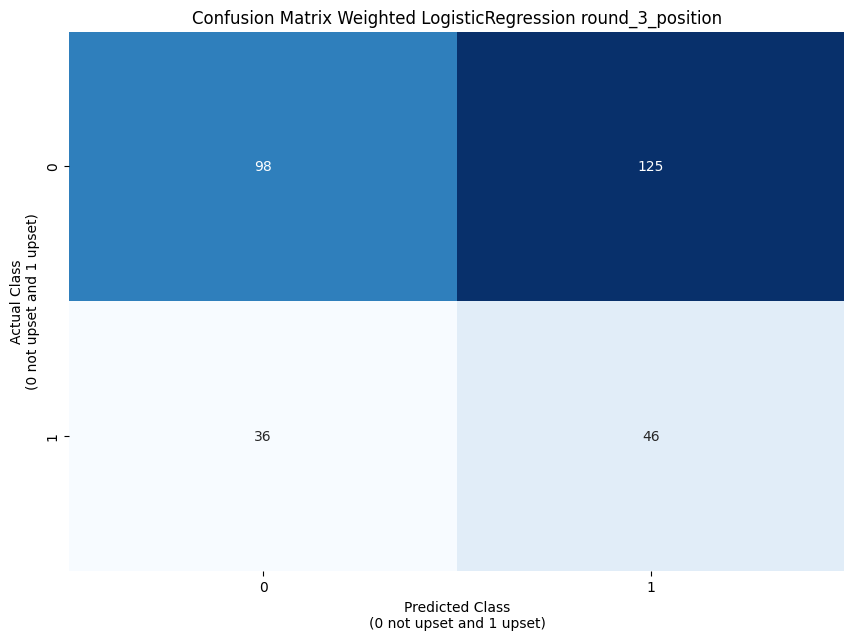

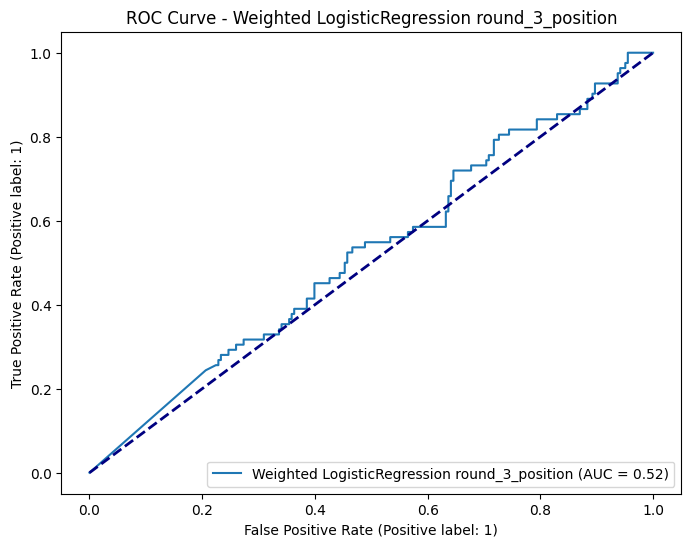

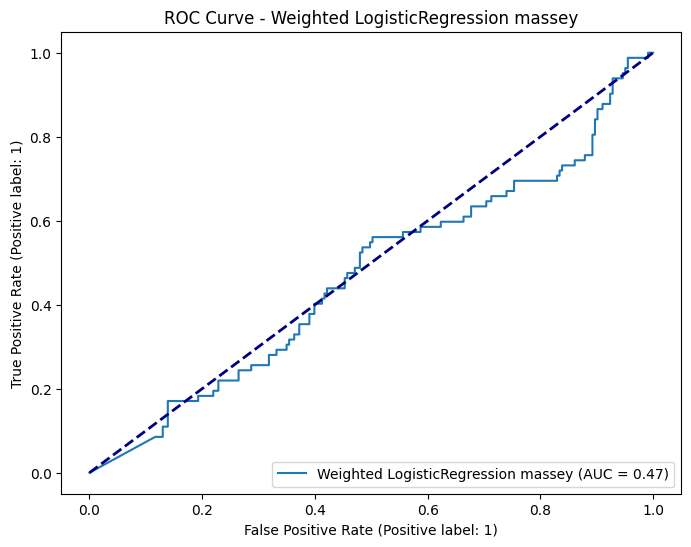

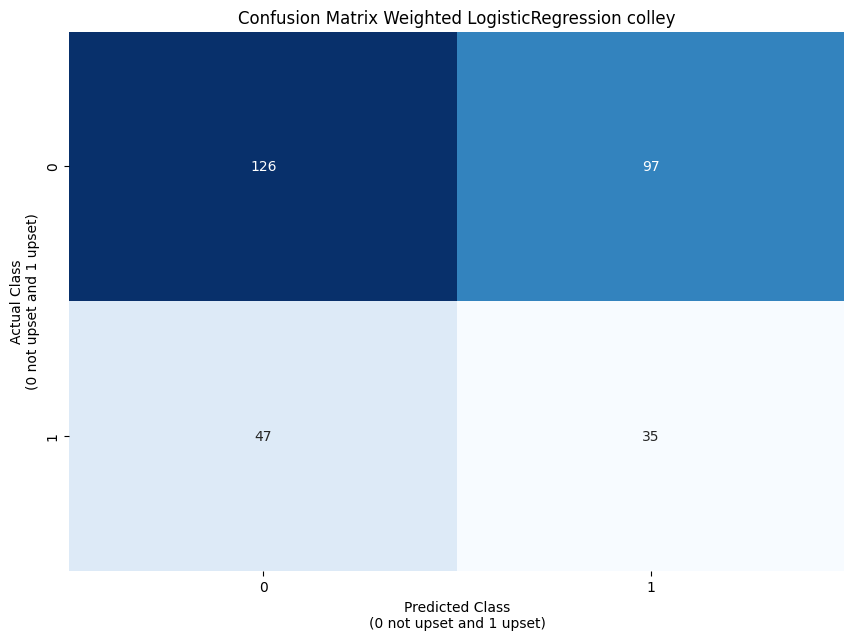

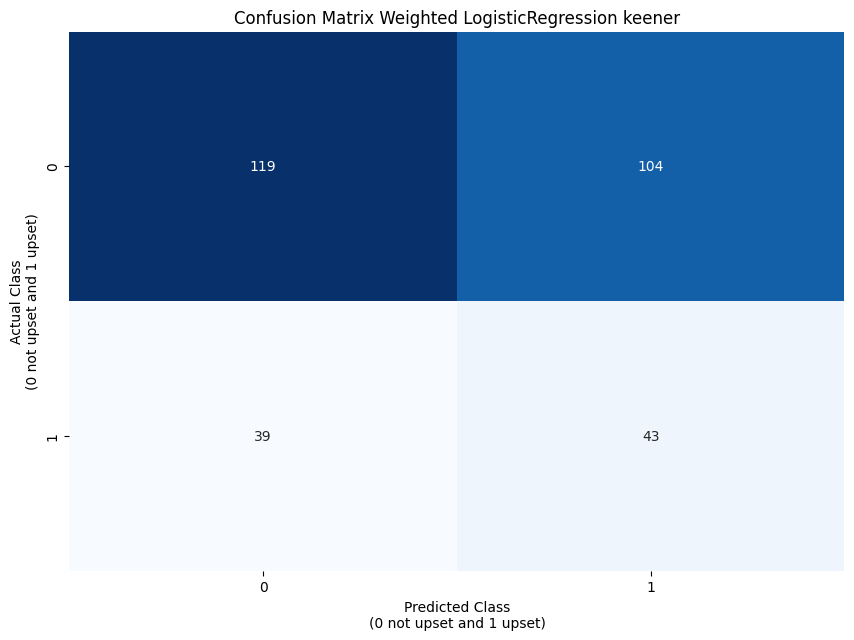

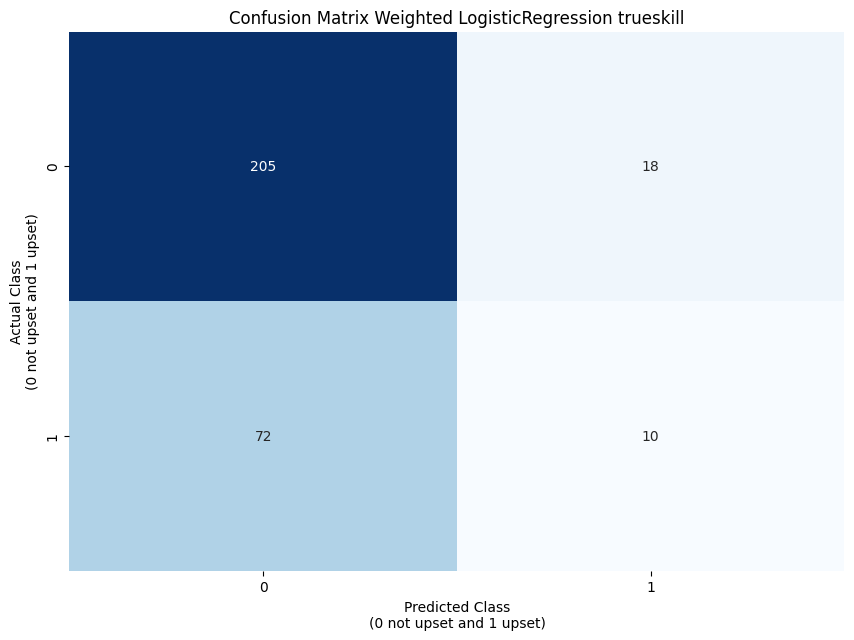

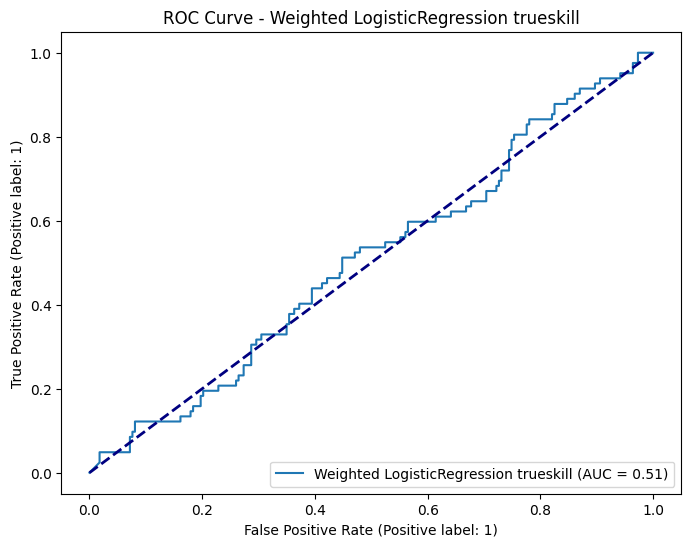

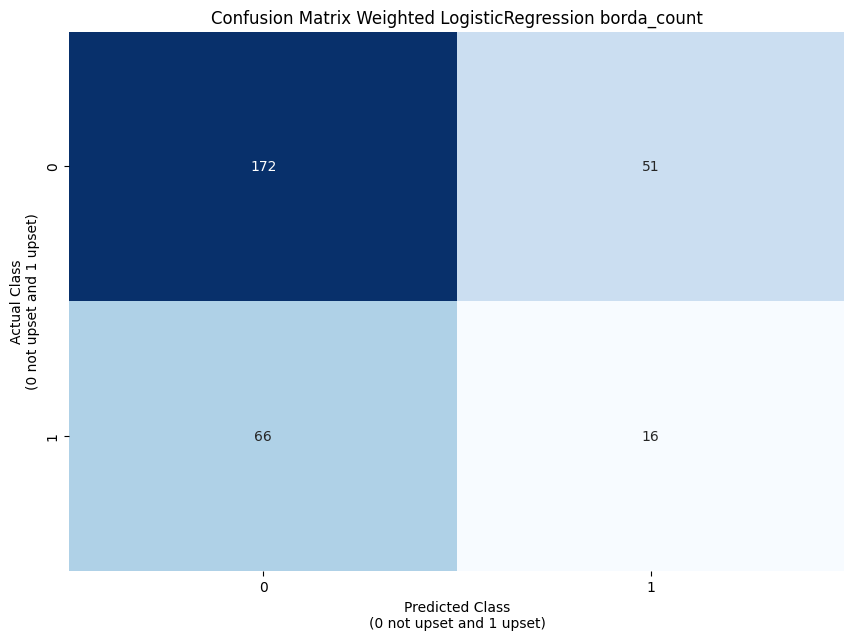

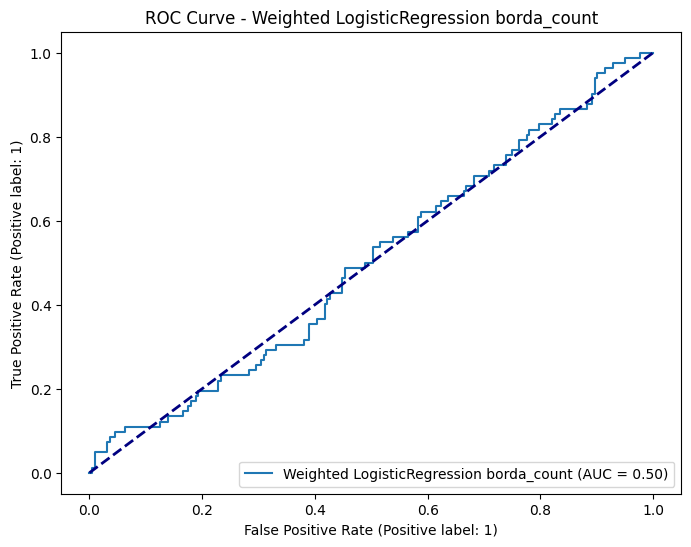

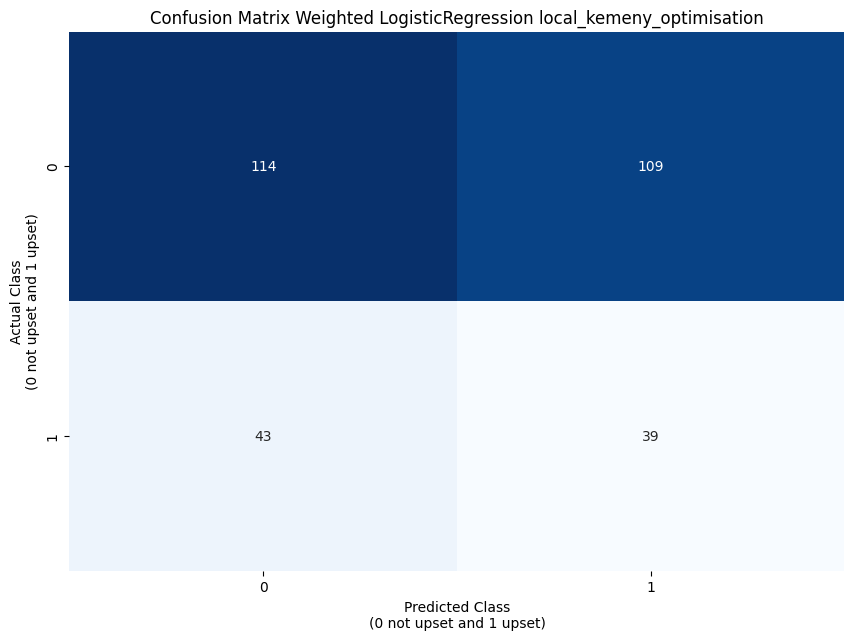

In [17]:
# Weighted Logistc Regression
model_name = "Weighted LogisticRegression"
random_state= 47

# Function to calculate weights
def calculate_weights(y):
    class_counts = y.value_counts()
    total_samples = len(y)
    return {class_label: int(round((1 - (count / total_samples)) * 100))
            for class_label, count in class_counts.items()}

# Empty df for consolidating confusion report results
all_results_df_wlr = pd.DataFrame(columns=['metric_id', 'metric'])

# Fold Grid SearchCV results
fold_results_wlr = []

# Define the ranking systems
ranking_systems = ['no_ranking','round_3_position', 'massey', 'colley', 'keener', 'trueskill', 'borda_count', 'local_kemeny_optimisation']

# Get all columns except the target and ranking columns
target_variable = 'target_variable'
base_features = [col for col in fa_cup_raw_features_df.columns if col != target_variable and not any(f"{team}_{ranking}" in col for team in ['home_team', 'away_team'] for ranking in ranking_systems)]


# Identify numeric and categorical columns
numeric_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ranking_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Define cross-validation strategy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

# Loop through each ranking system
for ranking in ranking_systems:
    model_name_ranking = f"{model_name} {ranking}"
    print(model_name_ranking)

    if ranking == 'no_ranking':
        # Use all base features without ranking
        X = fa_cup_raw_features_df[base_features]
    else:
          # Include ranking features
        current_features = base_features + [f'home_team_{ranking}', f'away_team_{ranking}']
        X = fa_cup_raw_features_df[current_features]

    y = fa_cup_raw_features_df['target_variable']

    # Initialize lists to store results for each fold of the model
    fold_accuracies = []
    fold_recalls = []
    confusion_matrices = []
    classification_reports = []
    all_y_true = []
    all_y_pred = []
    all_y_pred_proba = []  # Store probabilities for ROC

    # Perform cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Update preprocessor
        if ranking == 'no_ranking':
            preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numeric_features),
                    ('cat', categorical_transformer, categorical_features)
                ], verbose_feature_names_out=False)

        else:
            preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numeric_features),
                    ('cat', categorical_transformer, categorical_features),
                    ('rank', numeric_transformer, [f'home_team_{ranking}', f'away_team_{ranking}'])
                ], verbose_feature_names_out=False)

      # Calculate weights using only training data
        weights = calculate_weights(y_train)

        # Create pipeline
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', LogisticRegression(class_weight=weights,max_iter=1000))
        ])

 # Define the parameter grid for GridSearchCV
        param_grid = {
          'classifier__C': np.logspace(-3, 3, 7),
          'classifier__penalty': ['l1', 'l2'],
          'classifier__solver': ['liblinear']
        }


        # Create GridSearchCV object
        grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='recall', n_jobs=-1)

        # Fit GridSearchCV
        grid_search.fit(X_train, y_train)

        # Get best model
        best_model = grid_search.best_estimator_

         # Print the best recall from GridSearchCV
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Best Estimator's Recall (from GridSearchCV): {grid_search.best_score_:.3f}")

        # Fit and predict
        y_pred = best_model.predict(X_val)
        y_pred_proba = best_model.predict_proba(X_val)[:, 1] # Probabilities for the positive class and ROC curve/AUC Score

        # Calculate accuracy
        accuracy = accuracy_score(y_val, y_pred)
        fold_accuracies.append(accuracy)

        # Calculate recall
        recall = recall_score(y_val, y_pred)
        fold_recalls.append(recall)

         # Store fold results
        fold_results_slr.append({
            'Model Name Ranking': model_name_ranking,
            'Fold': fold,
            'Best Parameters (GridSearchCV)': grid_search.best_params_,
            'Best Recall (GridSearchCV)': grid_search.best_score_,
            'Validation Accuracy': accuracy,
            'Validation Recall': recall
        })

        # Confusion matrix
        cm = confusion_matrix(y_val, y_pred)
        confusion_matrices.append(cm)

        # Generate classification report
        cr = classification_report(y_val, y_pred, output_dict=True)
        classification_reports.append(cr)

        # Store true and predicted values for later analysis
        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)
        all_y_pred_proba.extend(y_pred_proba)

        print(f"Fold {fold} Accuracy: {accuracy:.3f}")
        print(f"Fold {fold} Recall: {recall:.3f}")

    # Calculate average accuracy
    avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f"Average Accuracy: {avg_accuracy:.3f}")

    # Calculate average recall
    avg_recall = sum(fold_recalls) / len(fold_recalls)
    print(f"Average Recall: {avg_recall:.3f}")

    # Calculate overall metrics
    mean_upset_accuracy = np.mean(fold_accuracies)
    std_upset_accuracy = np.std(fold_accuracies)
    mean_upset_recall = np.mean(fold_recalls)
    std_upset_recall = np.std(fold_recalls)

    # Create and display results using existing function
    results_df, cm_fig, roc_fig = create_model_results_df(all_y_true, all_y_pred, fold_accuracies,  all_y_pred_proba, model_name_ranking)
    results_df = results_df.reset_index()
    results_df['metric_id'] = results_df.index + 1
    results_df = results_df[['metric_id', 'metric', model_name_ranking]]

    all_results_df_wlr = all_results_df_wlr.merge(results_df, on=['metric_id', 'metric'], how='outer')

fold_results_wlr_df = pd.DataFrame(fold_results_wlr)
display(all_results_df_wlr)
display(fold_results_wlr_df)

# Change default ouput directory
os.chdir('/content/drive/MyDrive/birkbeck_msc-project/output_files')
# Save ranks to excel
all_results_df_wlr.to_excel("all_wlr_results.xlsx")
fold_results_wlr_df.to_excel("fold_results_wlr.xlsx")


In [ ]:
# Weighted Logistc Regression with home advatange
model_name = "Weighted LogisticRegression with home advantage"
random_state= 47

# Function to calculate weights
def calculate_weights(y):
    class_counts = y.value_counts()
    total_samples = len(y)
    return {class_label: int(round((1 - (count / total_samples)) * 100))
            for class_label, count in class_counts.items()}

# Empty df for consolidating confusion report results
all_results_df_wlrh = pd.DataFrame(columns=['metric_id', 'metric'])


# Fold Grid SearchCV results
fold_results_wlrh = []

# Define the ranking systems
ranking_systems = ['no_ranking','round_3_position', 'massey', 'colley', 'keener', 'trueskill', 'borda_count', 'local_kemeny_optimisation']

# Get all columns except the target and ranking columns
target_variable = 'target_variable'
base_features = [col for col in fa_cup_raw_features_df.columns if col != target_variable and not any(f"{team}_{ranking}" in col for team in ['home_team', 'away_team'] for ranking in ranking_systems)]


# Identify numeric and categorical columns
numeric_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ranking_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Define cross-validation strategy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

# Loop through each ranking system
for ranking in ranking_systems:
    model_name_ranking = f"{model_name} {ranking}"
    print(model_name_ranking)

    if ranking == 'no_ranking':
        # Use all base features without ranking
        X = fa_cup_raw_features_df[base_features]
    else:
        # Include ranking features
        current_features = base_features + [f'home_team_{ranking}', f'away_team_{ranking}']
        X = fa_cup_raw_features_df[current_features]

    y = fa_cup_raw_features_df['target_variable']

    # Initialize lists to store results for each fold of the model
    fold_accuracies = []
    confusion_matrices = []
    classification_reports = []
    all_y_true = []
    all_y_pred = []
    all_y_pred_proba = []  # Store probabilities for ROC

    # Perform cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]


        # Add home advantage factor
        X_train, home_advantage_column = add_home_advantage(X_train)
        X_val, _ = add_home_advantage(X_val)

        # Update numeric_features to include the home advantage column
        numeric_features = [home_advantage_column] + numeric_features

        # Update preprocessor with current features including home advantage
        if ranking == 'no_ranking':
            preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numeric_features),
                    ('cat', categorical_transformer, categorical_features)
                ], verbose_feature_names_out=False)

        else:
            preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numeric_features),
                    ('cat', categorical_transformer, categorical_features),
                    ('rank', numeric_transformer, [f'home_team_{ranking}', f'away_team_{ranking}'])
                ], verbose_feature_names_out=False)

        # Calculate weights using only training data
        weights = calculate_weights(y_train)

        # Create pipeline
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', LogisticRegression(class_weight=weights,max_iter=1000))
        ])

        # Define the parameter grid for GridSearchCV
        param_grid = {
          'classifier__C': np.logspace(-3, 3, 7),
          'classifier__penalty': ['l1', 'l2'],
          'classifier__solver': ['liblinear']
        }

        # Create GridSearchCV object
        grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='recall', n_jobs=-1)

        # Fit GridSearchCV
        grid_search.fit(X_train, y_train)

        # Get best model
        best_model = grid_search.best_estimator_

         # Print the best recall from GridSearchCV
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Best Estimator's Recall (from GridSearchCV): {grid_search.best_score_:.3f}")

        # Fit and predict
        y_pred = best_model.predict(X_val)
        y_pred_proba = best_model.predict_proba(X_val)[:, 1] # Probabilities for the positive class and ROC curve/AUC Score

        # Calculate accuracy
        accuracy = accuracy_score(y_val, y_pred)
        fold_accuracies.append(accuracy)

        # Confusion matrix
        cm = confusion_matrix(y_val, y_pred)
        confusion_matrices.append(cm)

        # Generate classification report
        cr = classification_report(y_val, y_pred, output_dict=True)
        classification_reports.append(cr)

        # Store true and predicted values for later analysis
        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)
        all_y_pred_proba.extend(y_pred_proba)

        print(f"Fold {fold} Accuracy: {accuracy:.3f}")

    # Calculate average accuracy
    avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f"Average Accuracy: {avg_accuracy:.3f}")

    # Create and display results using existing function
    results_df, cm_fig, roc_fig = create_model_results_df(all_y_true, all_y_pred, fold_accuracies,  all_y_pred_proba, model_name_ranking)
    results_df = results_df.reset_index()
    results_df['metric_id'] = results_df.index + 1
    results_df = results_df[['metric_id', 'metric', model_name_ranking]]

    all_results_df_wlrh = all_results_df_wlrh.merge(results_df, on=['metric_id', 'metric'], how='outer')

display(all_results_df_wlrh)

# Change default ouput directory
os.chdir('/content/drive/MyDrive/birkbeck_msc-project/output_files')
# Save ranks to excel
all_results_df_wlrh.to_excel("all_wlrh_results.xlsx")


metric_id                                       metric  \
0           1                    Cross-validation Accuracy   
1           2          Cross-validation Standard Deviation   
2           3                             Overall Accuracy   
3           4   Confusion Matrix - True Negative (Class 0)   
4           5  Confusion Matrix - False Positive (Class 1)   
5           6  Confusion Matrix - False Negative (Class 0)   
6           7   Confusion Matrix - True Positive (Class 1)   
7           8                          Precision (Class 0)   
8           9                             Recall (Class 0)   
9          10                           F1-score (Class 0)   
10         11                          Precision (Class 1)   
11         12                             Recall (Class 1)   
12         13                           F1-score (Class 1)   
13         14                          Macro avg Precision   
14         15                             Macro avg Recall   
15         16                           Macro avg F1-score   
16         17                       Weighted avg Precision   
17         18                          Weighted avg Recall   
18         19                        Weighted avg F1-score   
19         20                                      AUC-ROC   

   Weighted LogisticRegression with home advantage no_ranking  \
0                                               0.544           
1                                               0.096           
2                                               0.544           
3                                             128.000           
4                                              95.000           
5                                              44.000           
6                                              38.000           
7                                               0.744           
8                                               0.574           
9                                               0.648           
10                                              0.286           
11                                              0.463           
12                                              0.353           
13                                              0.515           
14                                              0.519           
15                                              0.501           
16                                              0.621           
17                                              0.544           
18                                              0.569           
19                                              0.535           

   Weighted LogisticRegression with home advantage round_3_position  \
0                                               0.564                 
1                                               0.085                 
2                                               0.564                 
3                                             132.000                 
4                                              91.000                 
5                                              42.000                 
6                                              40.000                 
7                                               0.759                 
8                                               0.592                 
9                                               0.665                 
10                                              0.305                 
11                                              0.488                 
12                                              0.376                 
13                                              0.532                 
14                                              0.540                 
15                                              0.520                 
16                                              0.637                 
17                                              0.564    

MLP Classifier Neural Network no_ranking
Fold 1 Accuracy: 0.984
Fold 2 Accuracy: 0.951
Fold 3 Accuracy: 0.934
Fold 4 Accuracy: 0.984
Fold 5 Accuracy: 0.852
Average Accuracy: 0.941
MLP Classifier Neural Network round_3_position
Fold 1 Accuracy: 1.000
Fold 2 Accuracy: 0.967
Fold 3 Accuracy: 0.951
Fold 4 Accuracy: 0.967
Fold 5 Accuracy: 0.902
Average Accuracy: 0.957
MLP Classifier Neural Network massey
Fold 1 Accuracy: 1.000
Fold 2 Accuracy: 0.967
Fold 3 Accuracy: 0.951
Fold 4 Accuracy: 0.934
Fold 5 Accuracy: 0.836
Average Accuracy: 0.938
MLP Classifier Neural Network colley
Fold 1 Accuracy: 0.984
Fold 2 Accuracy: 0.984
Fold 3 Accuracy: 0.934
Fold 4 Accuracy: 0.967
Fold 5 Accuracy: 0.902
Average Accuracy: 0.954
MLP Classifier Neural Network keener
Fold 1 Accuracy: 0.984
Fold 2 Accuracy: 0.967
Fold 3 Accuracy: 0.934
Fold 4 Accuracy: 0.967
Fold 5 Accuracy: 0.836
Average Accuracy: 0.938
MLP Classifier Neural Network trueskill
Fold 1 Accuracy: 0.984
Fold 2 Accuracy: 0.984
Fold 3 Accuracy: 0.9

metric_id                                       metric  \
0           1                    Cross-validation Accuracy   
1           2          Cross-validation Standard Deviation   
2           3                             Overall Accuracy   
3           4   Confusion Matrix - True Negative (Class 0)   
4           5  Confusion Matrix - False Positive (Class 1)   
5           6  Confusion Matrix - False Negative (Class 0)   
6           7   Confusion Matrix - True Positive (Class 1)   
7           8                          Precision (Class 0)   
8           9                             Recall (Class 0)   
9          10                           F1-score (Class 0)   
10         11                          Precision (Class 1)   
11         12                             Recall (Class 1)   
12         13                           F1-score (Class 1)   
13         14                          Macro avg Precision   
14         15                             Macro avg Recall   
15         16                           Macro avg F1-score   
16         17                       Weighted avg Precision   
17         18                          Weighted avg Recall   
18         19                        Weighted avg F1-score   
19         20                                      AUC-ROC   

   MLP Classifier Neural Network no_ranking  \
0                                     0.941   
1                                     0.048   
2                                     0.941   
3                                   220.000   
4                                     3.000   
5                                    15.000   
6                                    67.000   
7                                     0.936   
8                                     0.987   
9                                     0.961   
10                                    0.957   
11                                    0.817   
12                                    0.882   
13                                    0.947   
14                                    0.902   
15                                    0.921   
16                                    0.942   
17                                    0.941   
18                                    0.939   
19                                    0.986   

   MLP Classifier Neural Network round_3_position  \
0                                           0.957   
1                                           0.032   
2                                           0.957   
3                                         219.000   
4                                           4.000   
5                                           9.000   
6                                          73.000   
7                                           0.961   
8                                           0.982   
9                                           0.971   
10                                          0.948   
11                                          0.890   
12                                          0.918   
13                                          0.954   
14                                          0.936   
15                                          0.945   
16                                          0.957   
17                                          0.957   
18                                          0.957   
19                                          0.990   

   MLP Classifier Neural Network massey MLP Classifier Neural Network colley  \
0                                 0.938                                0.954   
1                                 0.055                                0.032   
2                                 0.938                                0.954   
3                               220.000                              219.000   
4                                 3.000                                4.000   
5                                16.000                               10.000   
6                                66.000

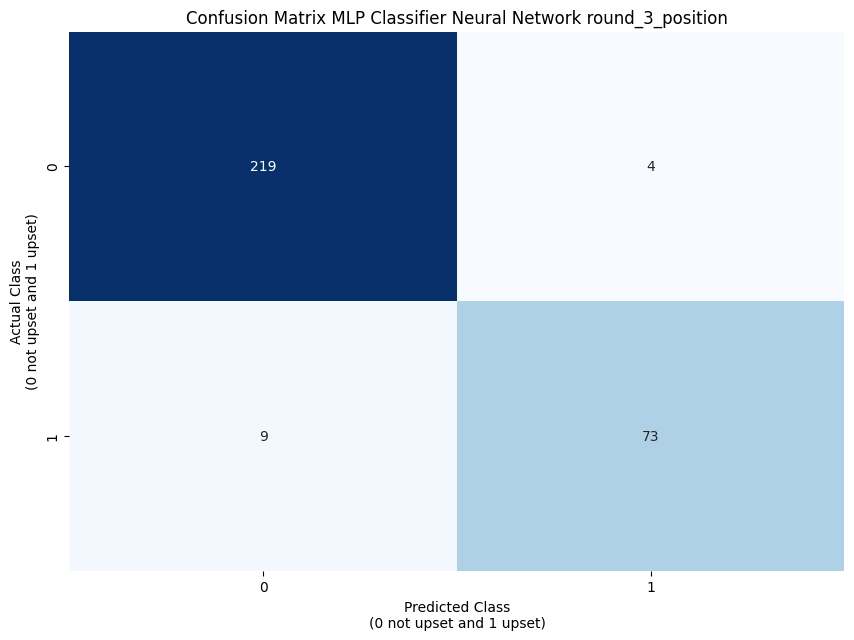

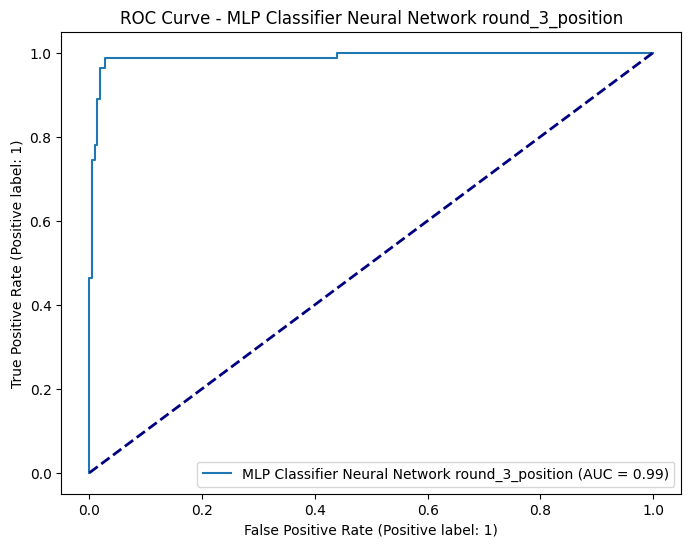

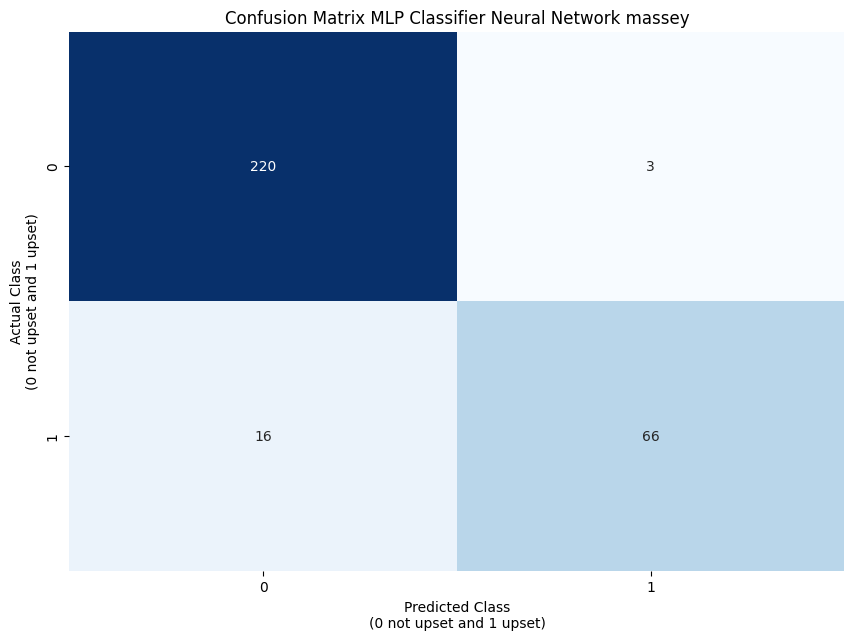

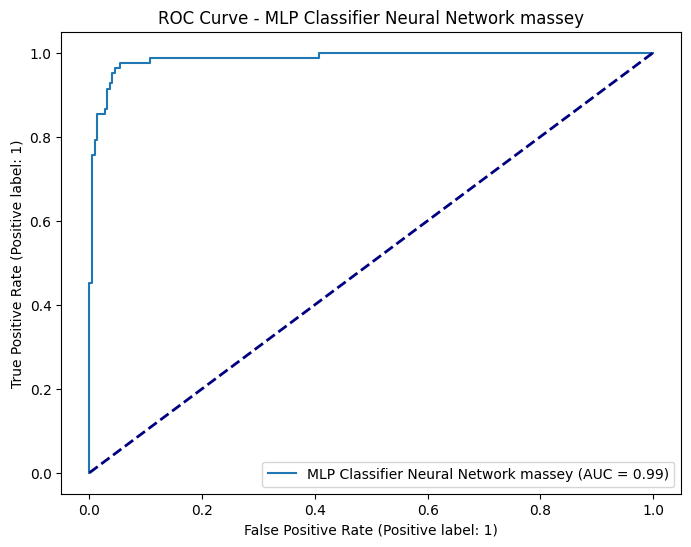

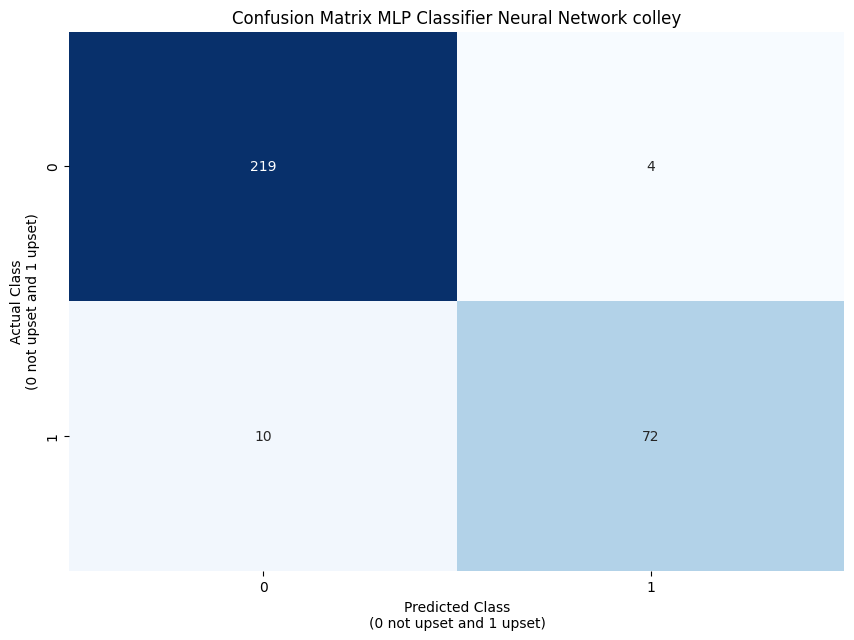

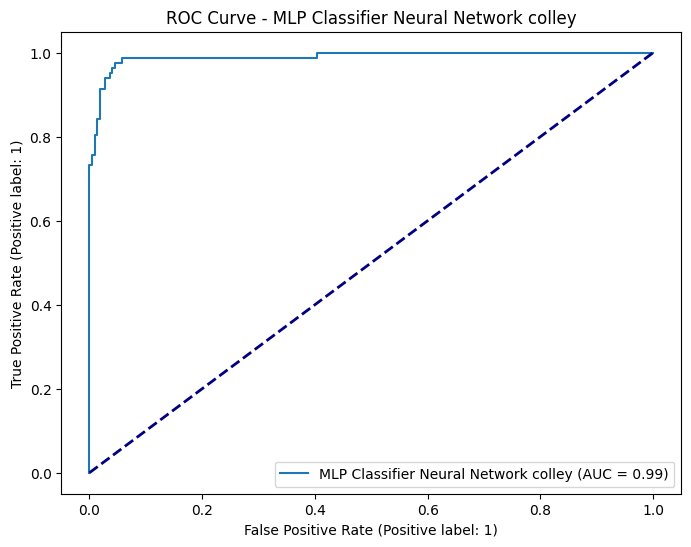

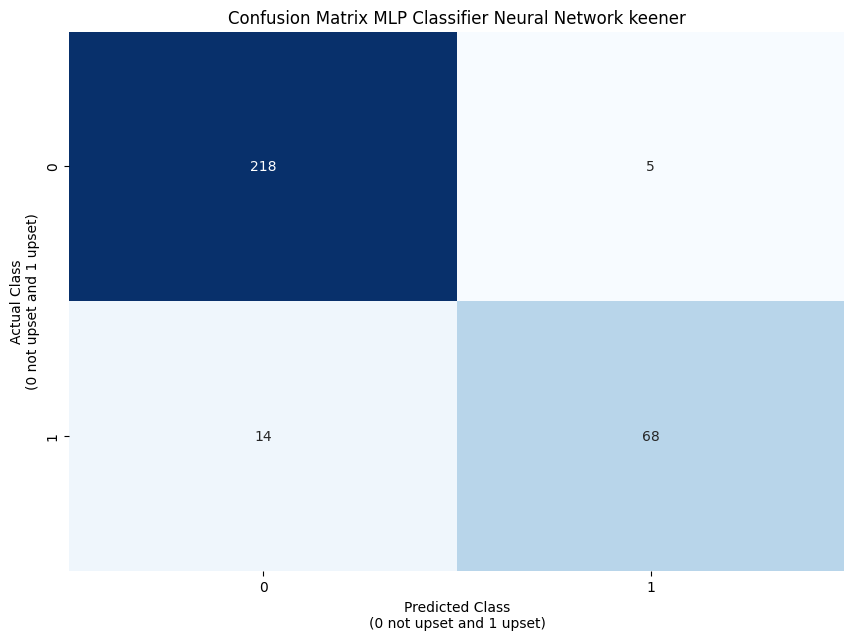

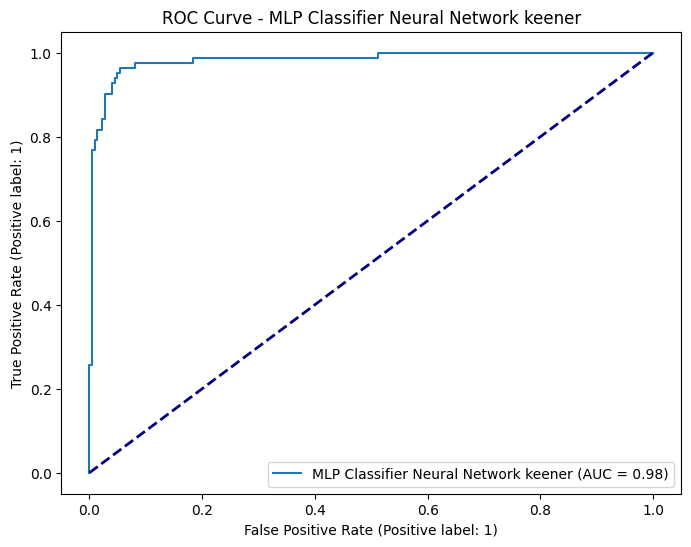

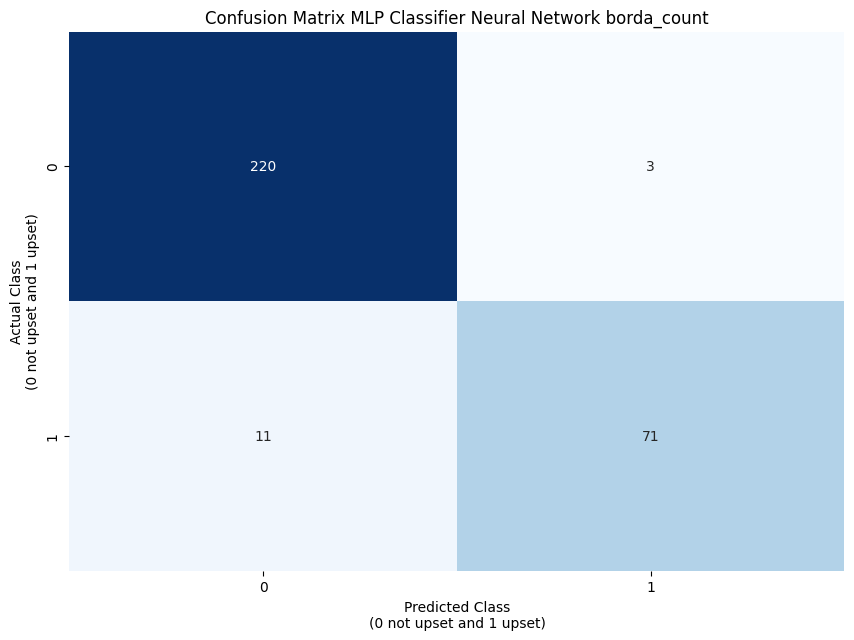

In [ ]:
# MCP Neural Network
model_name = "MLP Classifier Neural Network"
random_state= 47

# Empty df for consolidating confusion report results
all_results_df_nn = pd.DataFrame(columns=['metric_id', 'metric'])

# Define the ranking systems
ranking_systems = ['no_ranking','round_3_position', 'massey', 'colley', 'keener', 'trueskill', 'borda_count', 'local_kemeny_optimisation']

# Get all columns except the target and ranking columns
target_variable = 'target_variable'
base_features = [col for col in fa_cup_raw_features_df.columns if col != target_variable and not any(f"{team}_{ranking}" in col for team in ['home_team', 'away_team'] for ranking in ranking_systems)]


# Identify numeric and categorical columns
numeric_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ranking_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Define cross-validation strategy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

# Loop through each ranking system
for ranking in ranking_systems:
    #print(f"\nRunning model for {ranking} ranking system")
    model_name_ranking = f"{model_name} {ranking}"
    print(model_name_ranking)

    if ranking == 'no_ranking':
        # Use all base features without ranking
        X = fa_cup_raw_features_df[base_features]
    else:
        # Prepare the feature set for the current ranking system to Include ranking features
        current_features = base_features + [f'home_team_{ranking}', f'away_team_{ranking}']
        X = fa_cup_raw_features_df[current_features]

    y = fa_cup_raw_features_df['target_variable']

    # Initialize lists to store results for each fold of the model
    fold_accuracies = []
    confusion_matrices = []
    classification_reports = []
    all_y_true = []
    all_y_pred = []
    all_y_pred_proba = []  # Store probabilities for ROC

    # Perform cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Update preprocessor with current features including home advantage
        if ranking == 'no_ranking':
            preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numeric_features),
                    ('cat', categorical_transformer, categorical_features)
                ], verbose_feature_names_out=False)

        else:
            preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numeric_features),
                    ('cat', categorical_transformer, categorical_features),
                    ('rank', numeric_transformer, [f'home_team_{ranking}', f'away_team_{ranking}'])
                ], verbose_feature_names_out=False)

        # Fit preprocessor and transform data
        X_train_preprocessed = preprocessor.fit_transform(X_train)
        X_val_preprocessed = preprocessor.transform(X_val)

        # Create pipeline
        model = Pipeline([
          ('preprocessor', preprocessor),
          ('classifier', MLPClassifier(hidden_layer_sizes=(10), max_iter=10000, random_state=random_state))
          ])

        # Get feature names after preprocessing
        feature_names = preprocessor.get_feature_names_out()

        # Convert to DataFrame
        X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=feature_names, index=X_train.index)
        X_val_preprocessed_df = pd.DataFrame(X_val_preprocessed, columns=feature_names, index=X_val.index)

        # Simple check for missing values
        if X_train_preprocessed_df.isnull().values.any() or X_val_preprocessed_df.isnull().values.any():
          raise ValueError("Missing values found in preprocessed data. Please review your preprocessing steps.")

        # Fit and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        y_pred_proba = model.predict_proba(X_val)[:, 1]  # Probabilities for the positive class and ROC curve/AUC Score

        # Calculate accuracy
        accuracy = accuracy_score(y_val, y_pred)
        fold_accuracies.append(accuracy)

        # Confusion matrix
        cm = confusion_matrix(y_val, y_pred)
        confusion_matrices.append(cm)

        # Generate classification report
        cr = classification_report(y_val, y_pred, output_dict=True)
        classification_reports.append(cr)

        # Store true and predicted values for later analysis
        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)
        all_y_pred_proba.extend(y_pred_proba)

        print(f"Fold {fold} Accuracy: {accuracy:.3f}")

    # Calculate average accuracy
    avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f"Average Accuracy: {avg_accuracy:.3f}")

    # Create and display results using existing function
    results_df, cm_fig, roc_fig = create_model_results_df(all_y_true, all_y_pred, fold_accuracies,  all_y_pred_proba, model_name_ranking)
    results_df = results_df.reset_index()
    results_df['metric_id'] = results_df.index + 1
    results_df = results_df[['metric_id', 'metric', model_name_ranking]]

    all_results_df_nn = all_results_df_nn.merge(results_df, on=['metric_id', 'metric'], how='outer')

display(all_results_df_nn)

# Change default ouput directory
os.chdir('/content/drive/MyDrive/birkbeck_msc-project/output_files')
# Save ranks to excel
all_results_df_nn.to_excel("all_nn_results.xlsx")

MLP Classifier Neural Network with home advantage no_ranking
Fold 1 Accuracy: 0.984
Fold 2 Accuracy: 0.951
Fold 3 Accuracy: 0.934
Fold 4 Accuracy: 0.984
Fold 5 Accuracy: 0.852
Average Accuracy: 0.941
MLP Classifier Neural Network with home advantage round_3_position
Fold 1 Accuracy: 1.000
Fold 2 Accuracy: 0.967
Fold 3 Accuracy: 0.951
Fold 4 Accuracy: 0.967
Fold 5 Accuracy: 0.902
Average Accuracy: 0.957
MLP Classifier Neural Network with home advantage massey
Fold 1 Accuracy: 1.000
Fold 2 Accuracy: 0.967
Fold 3 Accuracy: 0.951
Fold 4 Accuracy: 0.934
Fold 5 Accuracy: 0.836
Average Accuracy: 0.938
MLP Classifier Neural Network with home advantage colley
Fold 1 Accuracy: 0.984
Fold 2 Accuracy: 0.984
Fold 3 Accuracy: 0.934
Fold 4 Accuracy: 0.967
Fold 5 Accuracy: 0.902
Average Accuracy: 0.954
MLP Classifier Neural Network with home advantage keener
Fold 1 Accuracy: 0.984
Fold 2 Accuracy: 0.967
Fold 3 Accuracy: 0.934
Fold 4 Accuracy: 0.967
Fold 5 Accuracy: 0.836
Average Accuracy: 0.938
MLP Cl

metric_id                                       metric  \
0           1                    Cross-validation Accuracy   
1           2          Cross-validation Standard Deviation   
2           3                             Overall Accuracy   
3           4   Confusion Matrix - True Negative (Class 0)   
4           5  Confusion Matrix - False Positive (Class 1)   
5           6  Confusion Matrix - False Negative (Class 0)   
6           7   Confusion Matrix - True Positive (Class 1)   
7           8                          Precision (Class 0)   
8           9                             Recall (Class 0)   
9          10                           F1-score (Class 0)   
10         11                          Precision (Class 1)   
11         12                             Recall (Class 1)   
12         13                           F1-score (Class 1)   
13         14                          Macro avg Precision   
14         15                             Macro avg Recall   
15         16                           Macro avg F1-score   
16         17                       Weighted avg Precision   
17         18                          Weighted avg Recall   
18         19                        Weighted avg F1-score   
19         20                                      AUC-ROC   

   MLP Classifier Neural Network with home advantage no_ranking  \
0                                               0.941             
1                                               0.048             
2                                               0.941             
3                                             220.000             
4                                               3.000             
5                                              15.000             
6                                              67.000             
7                                               0.936             
8                                               0.987             
9                                               0.961             
10                                              0.957             
11                                              0.817             
12                                              0.882             
13                                              0.947             
14                                              0.902             
15                                              0.921             
16                                              0.942             
17                                              0.941             
18                                              0.939             
19                                              0.986             

   MLP Classifier Neural Network with home advantage round_3_position  \
0                                               0.957                   
1                                               0.032                   
2                                               0.957                   
3                                             219.000                   
4                                               4.000                   
5                                               9.000                   
6                                              73.000                   
7                                               0.961                   
8                                               0.982                   
9                                               0.971                   
10                                              0.948                   
11                                              0.890                   
12                                              0.918                   
13                                              0.954                   
14                                              0.936                   
15                                              0.945                   
16                                              0.95

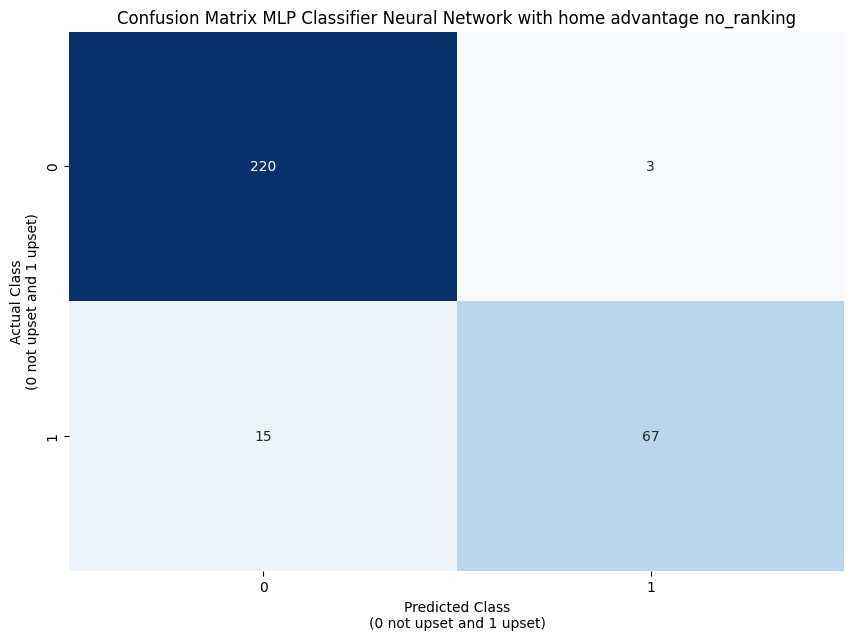

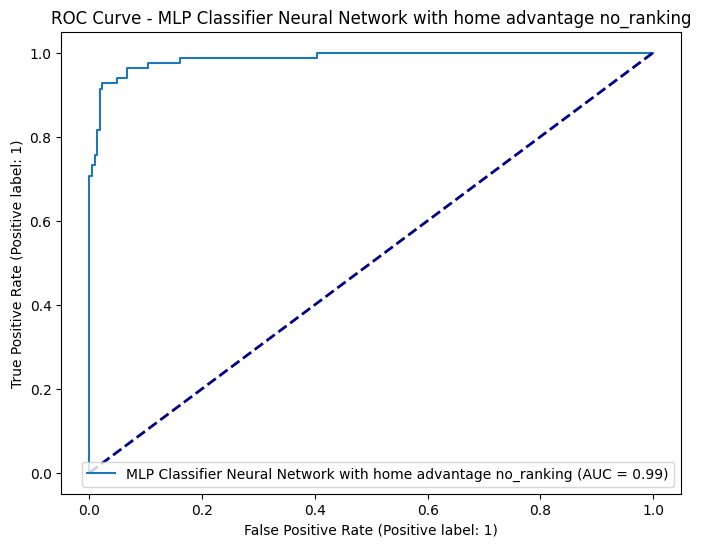

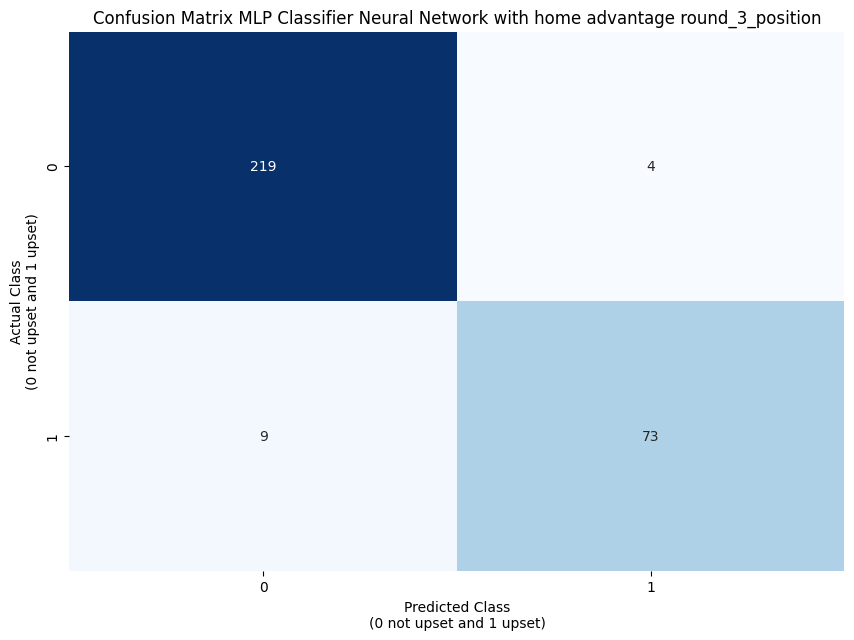

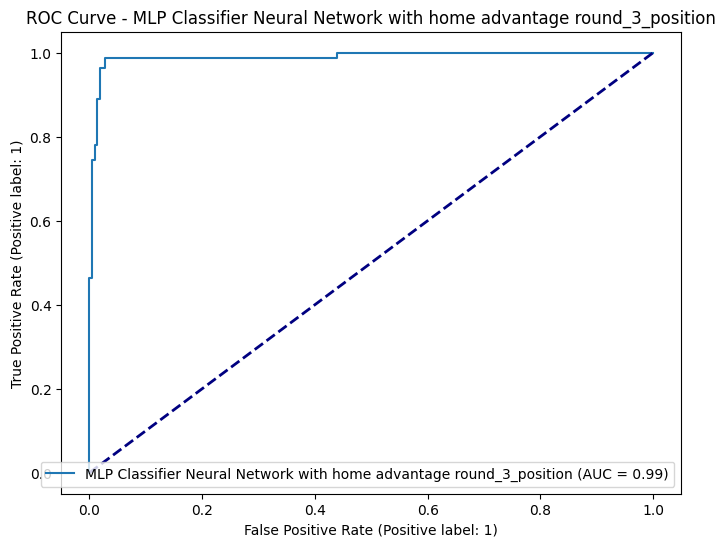

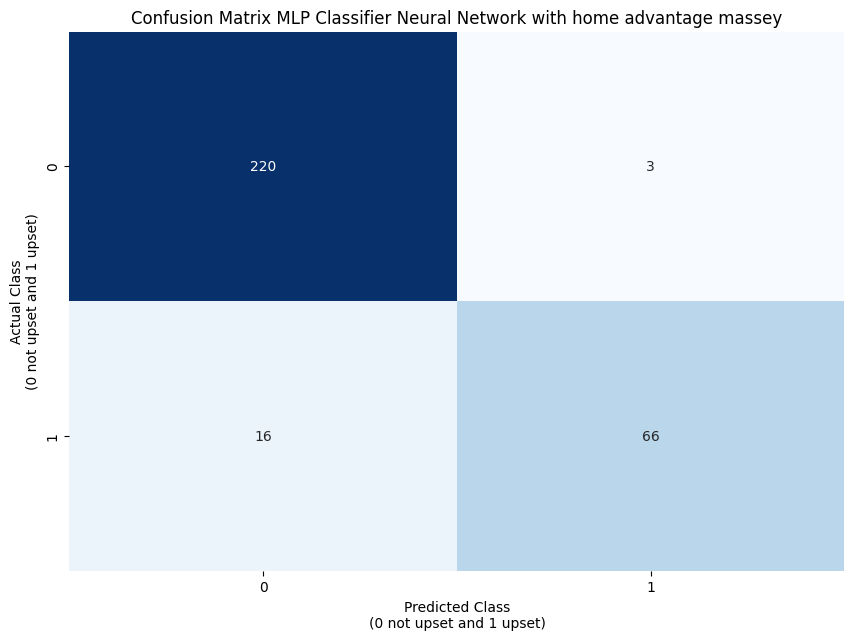

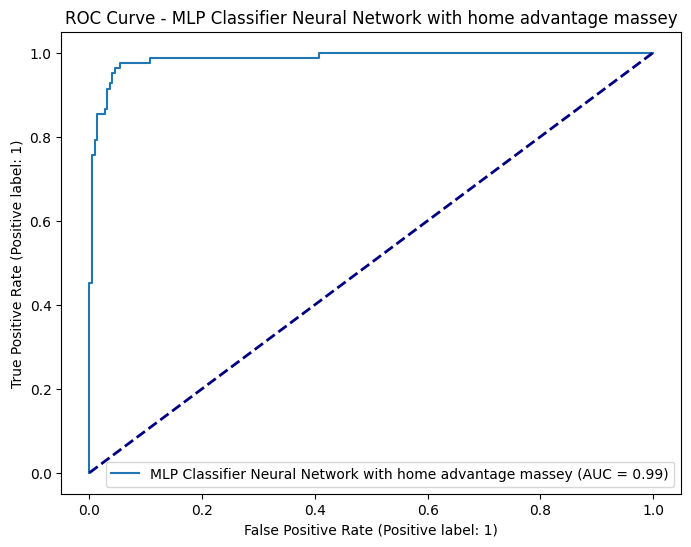

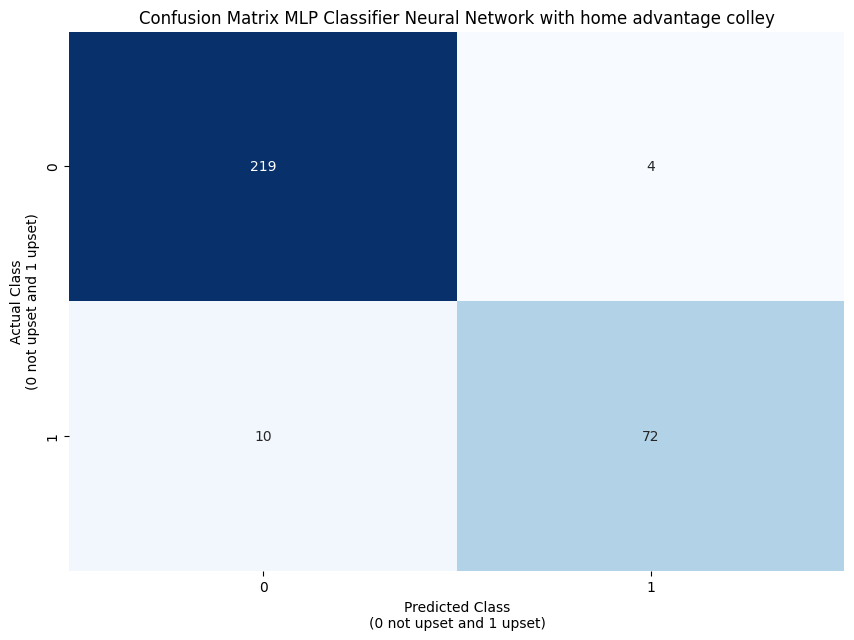

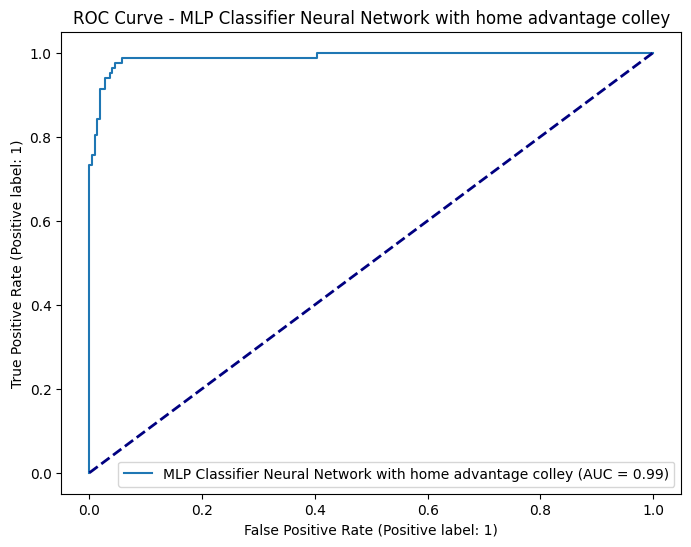

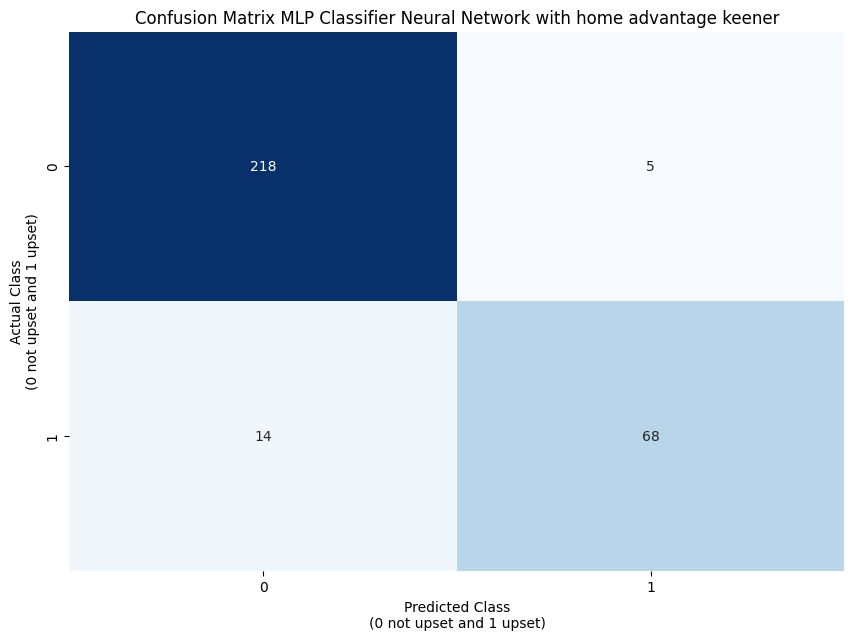

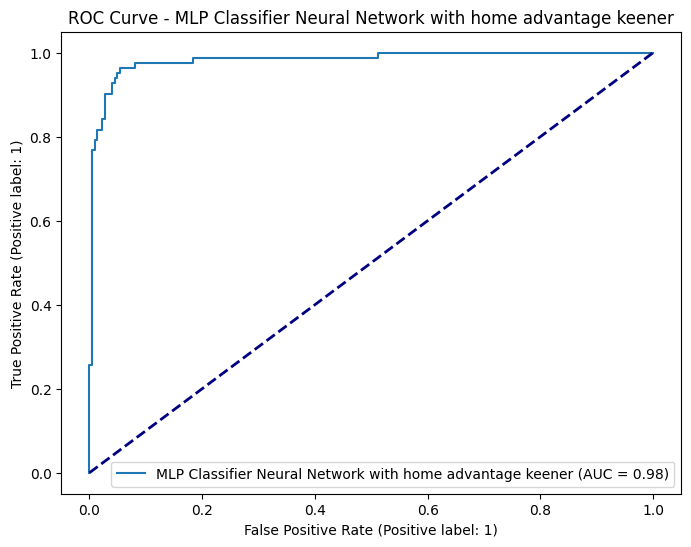

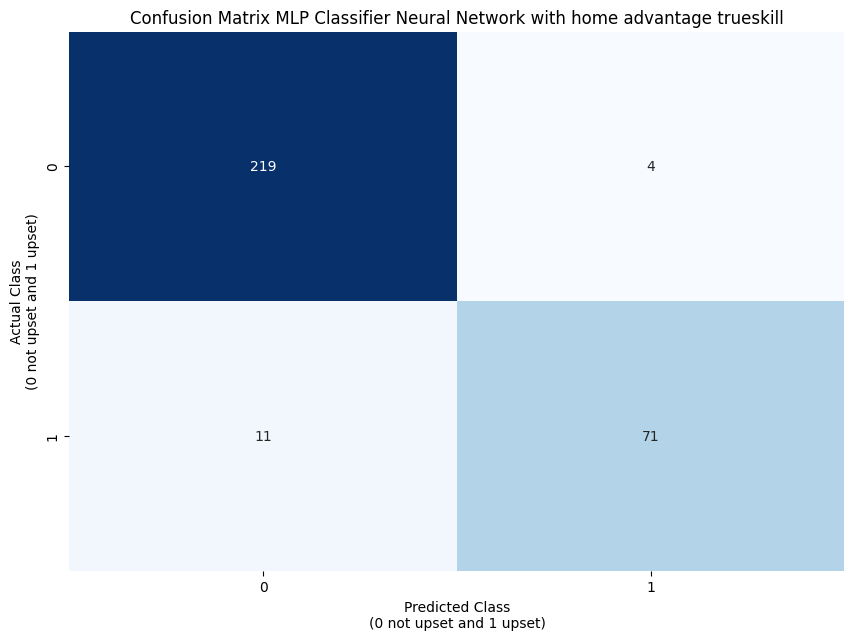

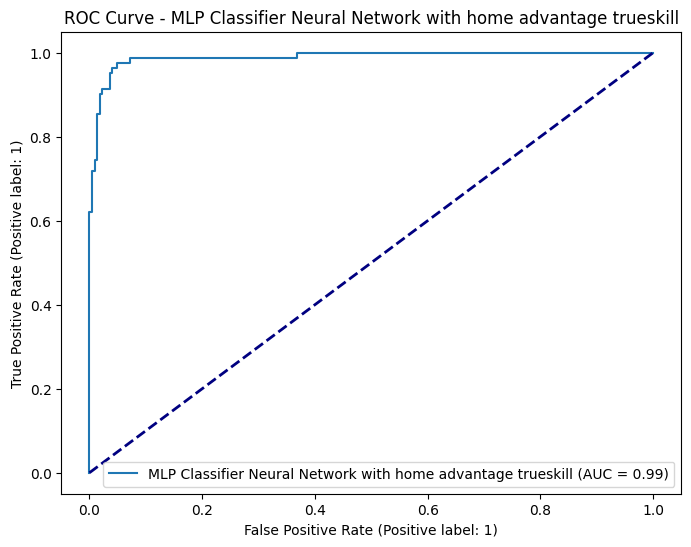

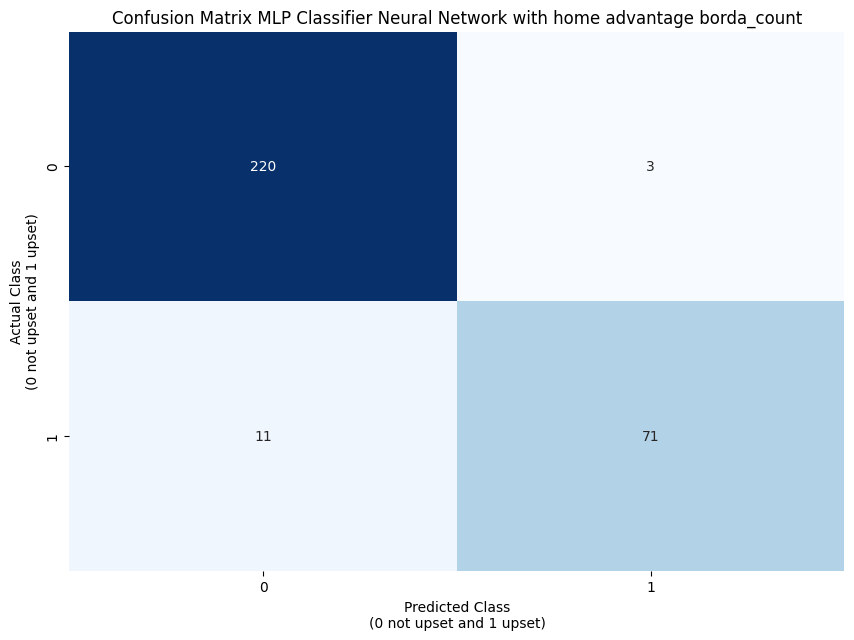

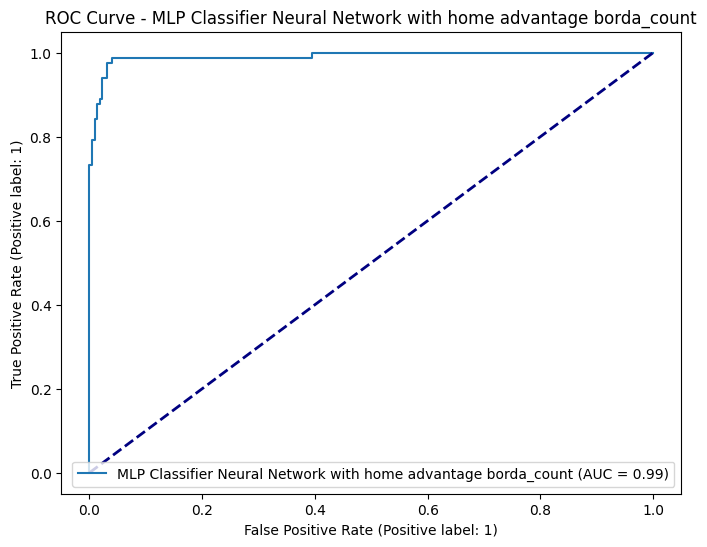

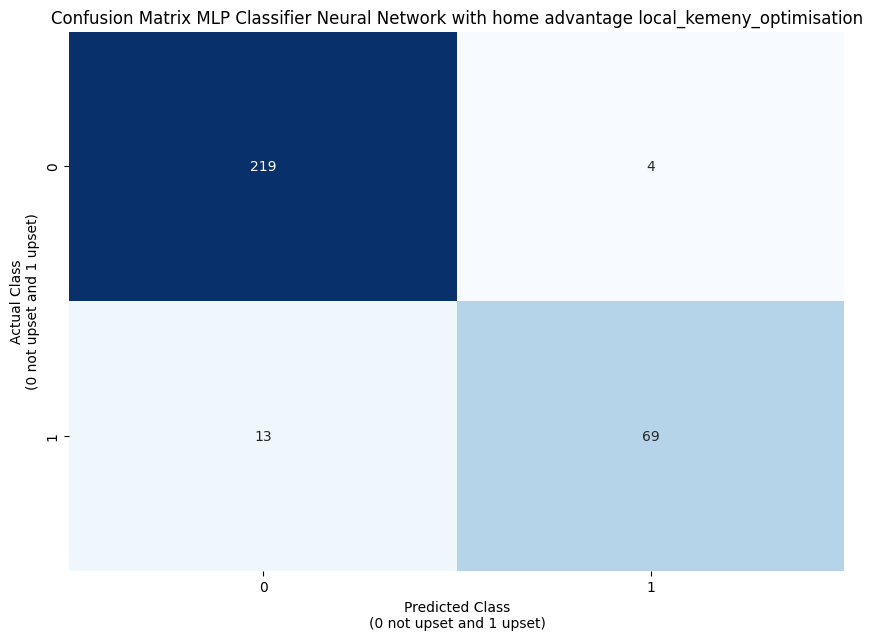

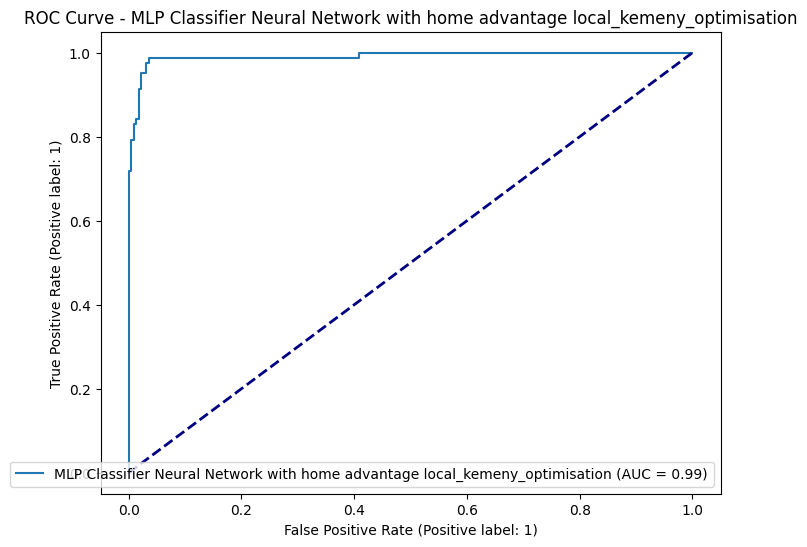

In [ ]:
# MCP Neural Network with home advantage
model_name = "MLP Classifier Neural Network with home advantage"
random_state= 47

# Empty df for consolidating confusion report results
all_results_df_nnh = pd.DataFrame(columns=['metric_id', 'metric'])

# Define the ranking systems
ranking_systems = ['no_ranking','round_3_position', 'massey', 'colley', 'keener', 'trueskill', 'borda_count', 'local_kemeny_optimisation']

# Get all columns except the target and ranking columns
target_variable = 'target_variable'
base_features = [col for col in fa_cup_raw_features_df.columns if col != target_variable and not any(f"{team}_{ranking}" in col for team in ['home_team', 'away_team'] for ranking in ranking_systems)]


# Identify numeric and categorical columns
numeric_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ranking_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Define cross-validation strategy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

# Loop through each ranking system
for ranking in ranking_systems:
    #print(f"\nRunning model for {ranking} ranking system")
    model_name_ranking = f"{model_name} {ranking}"
    print(model_name_ranking)

    if ranking == 'no_ranking':
        # Use all base features without ranking
        X = fa_cup_raw_features_df[base_features]
    else:
        # Prepare the feature set for the current ranking system to Include ranking features
        current_features = base_features + [f'home_team_{ranking}', f'away_team_{ranking}']
        X = fa_cup_raw_features_df[current_features]

    y = fa_cup_raw_features_df['target_variable']

    # Initialize lists to store results for each fold of the model
    fold_accuracies = []
    confusion_matrices = []
    classification_reports = []
    all_y_true = []
    all_y_pred = []
    all_y_pred_proba = []  # Store probabilities for ROC

    # Perform cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Add home advantage factor
        X_train, home_advantage_column = add_home_advantage(X_train)
        X_val, _ = add_home_advantage(X_val)

        # Update numeric_features to include the home advantage column
        numeric_features_with_ha = [home_advantage_column] + numeric_features

         # Update preprocessor with current features including home advantage
        if ranking == 'no_ranking':
            preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numeric_features),
                    ('cat', categorical_transformer, categorical_features)
                ], verbose_feature_names_out=False)

        else:
            preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numeric_features),
                    ('cat', categorical_transformer, categorical_features),
                    ('rank', numeric_transformer, [f'home_team_{ranking}', f'away_team_{ranking}'])
                ], verbose_feature_names_out=False)

        # Fit preprocessor and transform data
        X_train_preprocessed = preprocessor.fit_transform(X_train)
        X_val_preprocessed = preprocessor.transform(X_val)


        # Create pipeline
        model = Pipeline([
          ('preprocessor', preprocessor),
          ('classifier', MLPClassifier(hidden_layer_sizes=(10), max_iter=10000, random_state=random_state))
          ])

        # Get feature names after preprocessing
        feature_names = preprocessor.get_feature_names_out()

        # Convert to DataFrame
        X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=feature_names, index=X_train.index)
        X_val_preprocessed_df = pd.DataFrame(X_val_preprocessed, columns=feature_names, index=X_val.index)

        # Simple check for missing values
        if X_train_preprocessed_df.isnull().values.any() or X_val_preprocessed_df.isnull().values.any():
          raise ValueError("Missing values found in preprocessed data. Please review your preprocessing steps.")

        # Fit and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        y_pred_proba = model.predict_proba(X_val)[:, 1]  # Probabilities for the positive class and ROC curve/AUC Score

        # Calculate accuracy
        accuracy = accuracy_score(y_val, y_pred)
        fold_accuracies.append(accuracy)

        # Confusion matrix
        cm = confusion_matrix(y_val, y_pred)
        confusion_matrices.append(cm)

        # Generate classification report
        cr = classification_report(y_val, y_pred, output_dict=True)
        classification_reports.append(cr)

        # Store true and predicted values for later analysis
        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)
        all_y_pred_proba.extend(y_pred_proba)

        print(f"Fold {fold} Accuracy: {accuracy:.3f}")

    # Calculate average accuracy
    avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f"Average Accuracy: {avg_accuracy:.3f}")

    # Create and display results using existing function
    results_df, cm_fig, roc_fig = create_model_results_df(all_y_true, all_y_pred, fold_accuracies,  all_y_pred_proba, model_name_ranking)
    results_df = results_df.reset_index()
    results_df['metric_id'] = results_df.index + 1
    results_df = results_df[['metric_id', 'metric', model_name_ranking]]

    all_results_df_nnh = all_results_df_nnh.merge(results_df, on=['metric_id', 'metric'], how='outer')

display(all_results_df_nnh)

# Change default ouput directory
os.chdir('/content/drive/MyDrive/birkbeck_msc-project/output_files')
# Save ranks to excel
all_results_df_nnh.to_excel("all_nnh_results.xlsx")


In [ ]:
all_results_df_lr = all_results_df_slrh.merge(all_results_df_slr, on=['metric_id', 'metric'], how='outer')
all_results_df_slnn = all_results_df_nn.merge(all_results_df_lr, on=['metric_id', 'metric'], how='outer')
all_results_df = all_results_df_nnh.merge(all_results_df_slnn, on=['metric_id', 'metric'], how='outer')
display(all_results_df)

In [ ]:
# Load updated Confusion Matrix results to Google Big Query
load_dataset_name = 'analysis_layer'
load_table_name = 'lr_ann_model_confusion_matrix_results'
full_table_name = f"{load_dataset_name}.{load_table_name}"
pandas_gbq.to_gbq(all_results_df, full_table_name, project_id='birkbeck-msc-project-422917', if_exists='replace')